### MEMO_0707 (v0707_1.0)

### _* Memo_0707_2_

In [1]:
candidate = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0}

In [48]:
## this code was run.
#!pip install keras-tuner
# import numpy as np
# import pandas as pd
import os
from datetime import datetime
from tqdm import tqdm
# print(f'Current Step #01 [now = {datetime.now()}')
from IPython.display import Markdown

from lib.analy_util import ( draw_markdown,
                             draw_graph,
                             draw_scatter,
                             get_pre_bef,
                             draw_average,
                             get_frequency,
                             get_information,
                             analyze_v1,
                             data_prepare,
                             search_model
                             )
print(f'define this code. [{datetime.now()}]')


title = "Metrics"
row_length = 400
new_to_old = True
show_mark_down = True
markdown_table_limit_length = 40


define this code. [2025-07-11 15:39:15.485690]


In [31]:
# Display the variable's value in Markdown
contents = f"###### Updated {datetime.now()}\n\n### {title}\n"
query = 'select round, metric, bonus from results'
query += f' order by round {"desc" if new_to_old else "asc"}'
limit_str = f'limit {row_length}'
query += f' {limit_str if row_length > 0 else ""}'
rows = !echo "{query}"| sqlite3 ../db/metrics.db
table_rows = ["|round|numbers|bonus|sum|0|10|20|30|40|",
              "|--|--|--|--|--|--|--|--|--|"
             ]
rows_dict = {1:[], 10:[], 20:[], 30:[], 40:[]}
nums_t = []
sums = []
cur_table_limit = 0
print(f'row\'s len = {len(rows)}')
for row in rows:
    cols = row.split('|')
    if len(cols) == 3:
        num_00 = 0
        num_10 = 0
        num_20 = 0
        num_30 = 0
        num_40 = 0
        nums_list = [int(i) for i in cols[1].split(',')]
        for num in nums_list:
            if num < 10:
                num_00 += 1
            if num >= 10 and num < 20:
                num_10 += 1
            if num >= 20 and num < 30:
                num_20 += 1
            if num >= 30 and num < 40:
                num_30 += 1
            if num >= 40 :
                num_40 += 1
        rows_dict[1].append(num_00)
        rows_dict[10].append(num_10)
        rows_dict[20].append(num_20)
        rows_dict[30].append(num_30)
        rows_dict[40].append(num_40)
        if cur_table_limit < markdown_table_limit_length:
            nums=[f"{i:02}" for i in nums_list] 
            table_rows.append(f"|{cols[0]}|{",".join(nums)}|{cols[2]}|{sum(nums_list)}|{num_00}|{num_10}|{num_20}|{num_30}|{num_40}|")
            cur_table_limit += 1
        nums_t.append(nums_list)
        sums.append(sum(nums_list))
sums.reverse()
table_rows_str = "\n".join(table_rows)
contents+=table_rows_str + "\n" + f"###### Updated {datetime.now()}"
Markdown(contents)

row's len = 400


###### Updated 2025-07-11 14:55:36.981047

### Metrics
|round|numbers|bonus|sum|0|10|20|30|40|
|--|--|--|--|--|--|--|--|--|
|1180|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1179|03,16,18,24,40,44|21|145|1|2|1|0|2|
|1178|05,06,11,27,43,44|17|136|2|1|1|0|2|
|1177|03,07,15,16,19,43|21|103|2|3|0|0|1|
|1176|07,09,11,21,30,35|29|113|2|1|1|2|0|
|1175|03,04,06,08,32,42|31|95|4|0|0|1|1|
|1174|08,11,14,17,36,39|22|125|1|3|0|2|0|
|1173|01,05,18,20,30,35|3|109|2|1|1|2|0|
|1172|07,09,24,40,42,44|45|166|2|0|1|0|3|
|1171|03,06,07,11,12,17|19|56|3|3|0|0|0|
|1170|03,13,28,34,38,42|25|158|1|1|1|2|1|
|1169|05,12,24,26,39,42|20|148|1|1|2|1|1|
|1168|09,21,24,30,33,37|29|154|1|0|2|3|0|
|1167|08,23,31,35,39,40|24|176|1|0|1|3|1|
|1166|14,23,25,27,29,42|16|160|0|1|4|0|1|
|1165|06,07,27,29,38,45|17|152|2|0|2|1|1|
|1164|17,18,23,25,38,39|22|160|0|2|2|2|0|
|1163|02,13,15,16,33,43|4|122|1|3|0|1|1|
|1162|20,21,22,25,28,29|6|145|0|0|6|0|0|
|1161|02,12,20,24,34,42|37|134|1|1|2|1|1|
|1160|07,13,18,36,39,45|19|158|1|2|0|2|1|
|1159|03,09,27,28,38,39|7|144|2|0|2|2|0|
|1158|21,25,27,32,37,38|20|180|0|0|3|3|0|
|1157|05,07,12,20,25,26|28|95|2|1|3|0|0|
|1156|30,31,34,39,41,45|7|220|0|0|0|4|2|
|1155|10,16,19,27,37,38|13|147|0|3|1|2|0|
|1154|04,08,22,26,32,38|27|130|2|0|2|2|0|
|1153|01,09,10,13,35,44|5|112|2|2|0|1|1|
|1152|30,31,32,35,36,37|5|201|0|0|0|6|0|
|1151|02,03,09,15,27,29|8|85|3|1|2|0|0|
|1150|08,09,18,35,39,45|25|154|2|1|0|2|1|
|1149|08,15,19,21,32,36|38|131|1|2|1|2|0|
|1148|03,06,13,15,16,22|32|75|2|3|1|0|0|
|1147|07,11,24,26,27,37|32|132|1|1|3|1|0|
|1146|06,11,17,19,40,43|28|136|1|3|0|0|2|
|1145|02,11,31,33,37,44|32|158|1|1|0|3|1|
|1144|03,04,12,15,26,34|6|94|2|2|1|1|0|
|1143|10,16,17,27,28,36|6|134|0|3|2|1|0|
|1142|02,08,28,30,37,41|22|146|2|0|1|2|1|
|1141|07,11,12,21,26,35|20|112|1|2|2|1|0|
|1140|07,10,22,29,31,38|15|137|1|1|2|2|0|
|1139|05,12,15,30,37,40|18|139|1|2|0|2|1|
|1138|14,16,19,20,29,34|35|132|0|3|2|1|0|
|1137|04,09,12,15,33,45|26|118|2|2|0|1|1|
|1136|21,33,35,38,42,44|1|213|0|0|1|3|2|
|1135|01,06,13,19,21,33|4|93|2|2|1|1|0|
|1134|03,07,09,13,19,24|23|75|3|2|1|0|0|
|1133|13,14,20,28,29,34|23|138|0|2|3|1|0|
|1132|06,07,19,28,34,41|5|135|2|1|1|1|1|
|1131|01,02,06,14,27,38|33|88|3|1|1|1|0|
|1130|15,19,21,25,27,28|40|135|0|2|4|0|0|
|1129|05,10,11,17,28,34|22|105|1|3|1|1|0|
|1128|01,05,08,16,28,33|45|91|3|1|1|1|0|
|1127|10,15,24,30,31,37|32|147|0|2|1|3|0|
|1126|04,05,09,11,37,40|7|106|3|1|0|1|1|
|1125|06,14,25,33,40,44|30|162|1|1|1|1|2|
|1124|03,08,17,30,33,34|28|125|2|1|0|3|0|
|1123|13,19,21,24,34,35|26|146|0|2|2|2|0|
|1122|03,06,21,30,34,35|22|129|2|0|1|3|0|
|1121|06,24,31,32,38,44|8|175|1|0|1|3|1|
|1120|02,19,26,31,38,41|34|157|1|1|1|2|1|
|1119|01,09,12,13,20,45|3|100|2|2|1|0|1|
|1118|11,13,14,15,16,45|3|114|0|5|0|0|1|
|1117|03,04,09,30,33,36|7|115|3|0|0|3|0|
|1116|15,16,17,25,30,31|32|134|0|3|1|2|0|
|1115|07,12,23,32,34,36|8|144|1|1|1|3|0|
|1114|10,16,19,32,33,38|3|148|0|3|0|3|0|
|1113|11,13,20,21,32,44|8|141|0|2|2|1|1|
|1112|16,20,26,36,42,44|24|184|0|1|2|1|2|
|1111|03,13,30,33,43,45|4|167|1|1|0|2|2|
|1110|03,07,11,20,22,41|24|104|2|1|2|0|1|
|1109|10,12,13,19,33,40|2|127|0|4|0|1|1|
|1108|07,19,26,37,39,44|27|172|1|1|1|2|1|
|1107|06,14,30,31,40,41|29|162|1|1|0|2|2|
|1106|01,03,04,29,42,45|36|124|3|0|1|0|2|
|1105|06,16,34,37,39,40|11|172|1|1|0|3|1|
|1104|01,07,21,30,35,38|2|132|2|0|1|3|0|
|1103|10,12,29,31,40,44|2|166|0|2|1|1|2|
|1102|13,14,22,26,37,38|20|150|0|2|2|2|0|
|1101|06,07,13,28,36,42|41|132|2|1|1|1|1|
|1100|17,26,29,30,31,43|12|176|0|1|2|2|1|
|1099|03,20,28,38,40,43|4|172|1|0|2|1|2|
|1098|12,16,21,24,41,43|15|157|0|2|2|0|2|
|1097|14,33,34,35,37,40|4|193|0|1|0|4|1|
|1096|01,12,16,19,23,43|34|114|1|3|1|0|1|
|1095|08,14,28,29,34,40|12|153|1|1|2|1|1|
|1094|06,07,15,22,26,40|41|116|2|1|2|0|1|
|1093|10,17,22,30,35,43|44|157|0|2|1|2|1|
|1092|07,18,19,26,33,45|37|148|1|2|1|1|1|
|1091|06,20,23,24,28,30|44|131|1|0|4|1|0|
|1090|12,19,21,29,40,45|1|166|0|2|2|0|2|
|1089|04,18,31,37,42,43|40|175|1|1|0|2|2|
|1088|11,21,22,30,39,44|31|167|0|1|2|2|1|
|1087|13,14,18,21,34,44|16|144|0|3|1|1|1|
|1086|11,16,25,27,35,36|37|150|0|2|2|2|0|
|1085|04,07,17,18,38,44|36|128|2|2|0|1|1|
|1084|08,12,13,29,33,42|5|137|1|2|1|1|1|
|1083|03,07,14,15,22,38|17|99|2|2|1|1|0|
|1082|21,26,27,32,34,42|31|182|0|0|3|2|1|
|1081|01,09,16,23,24,38|17|111|2|1|2|1|0|
###### Updated 2025-07-11 14:55:36.990574

In [4]:
"""
data preparation
"""

#########
# nums_t
nums_by_row = [[] for i in range(6)]
for nums in nums_t:
    for i in range(6):
        nums_by_row[i].append(nums[i])
for i in range(6):
    nums_by_row[i].reverse()

##########
# row_list
row_list = []
row_list_none_last = []
for nums in nums_by_row:
    row_list.append(nums[0:-1])
    row_list_none_last.append(nums[0: len(nums)-1])

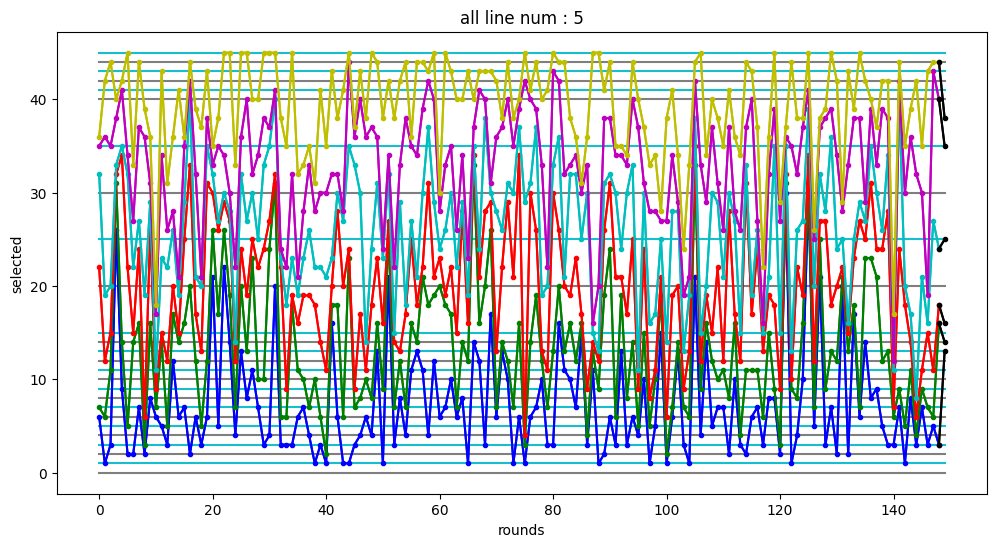

In [88]:
ext_datas = []

for key in candidate:
    ext_datas.append((key, candidate[key]))

# show_cols = [0, 1, 2, 3, 4, 5]
# show_cols = [0, 1, 2, 3, 4, 5]
helper_line_nums=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                  20, 25, 30, 35, 40,
                  41, 42, 43, 44, 45]
show_cols = [0, 1, 2, 3, 4, 5]
show_label = False
show_cnt = 150

start_pos = row_length - show_cnt

show_data = []
for i in range(6):
    show_data.append(row_list[i][start_pos:])

draw_scatter(show_data, f'all line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=helper_line_nums)


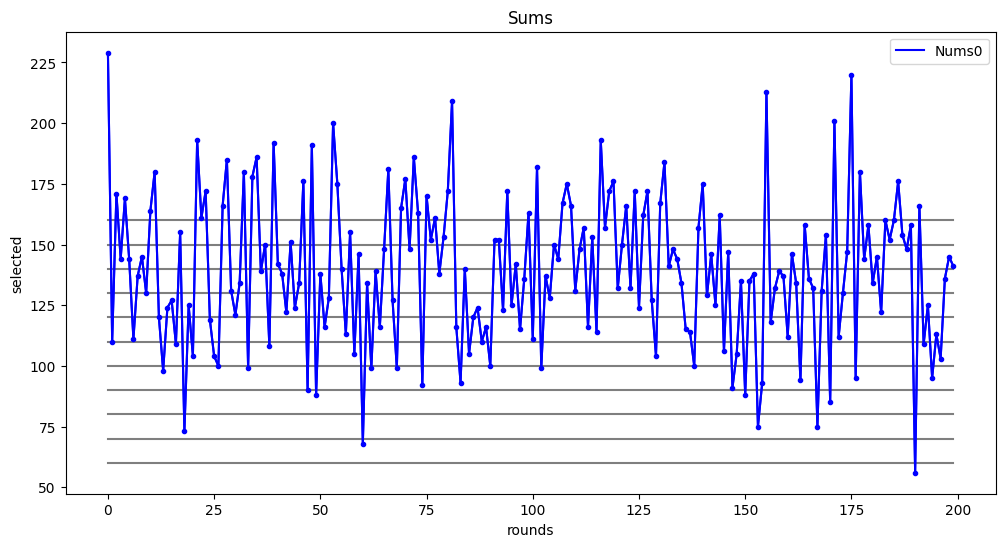

candidate =  141
candidate =  dict_values([13, 14, 16, 25, 35, 38])
last      =  [127, 172, 145, 130, 109, 117, 95, 116, 91, 128, 130, 118, 162, 118, 124, 165, 174, 116, 173, 100, 194, 117, 127, 118, 109, 163, 128, 183, 112, 131, 140, 89, 196, 176, 152, 148, 105, 141, 197, 160, 123, 134, 159, 141, 146, 147, 134, 123, 163, 120, 118, 155, 182, 152, 143, 89, 163, 147, 67, 117, 131, 189, 179, 121, 164, 182, 154, 118, 137, 163, 155, 154, 130, 187, 146, 202, 132, 174, 183, 114, 115, 207, 182, 94, 150, 163, 136, 185, 131, 190, 110, 144, 105, 128, 188, 144, 128, 91, 79, 135, 127, 223, 173, 151, 139, 194, 147, 125, 164, 103, 161, 116, 122, 212, 191, 151, 109, 181, 140, 127, 130, 148, 104, 130, 128, 112, 199, 129, 159, 130, 109, 112, 121, 178, 91, 152, 121, 132, 144, 141, 115, 108, 138, 177, 184, 120, 163, 109, 85, 175, 155, 133, 191, 142, 148, 95, 116, 105, 169, 125, 157, 160, 147, 115, 134, 150, 110, 171, 190, 112, 157, 136, 144, 135, 124, 128, 154, 109, 135, 151, 166, 155, 136, 183, 133, 147,

In [87]:
s1 = sums[:-1] + [sum(candidate.values())]
draw_scatter([s1[200:]], f'Sums', helper_line_nums=[60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160])
print('candidate = ', sum(candidate.values()))
print('candidate = ', candidate.values())
print('last      = ', sums[:-1])

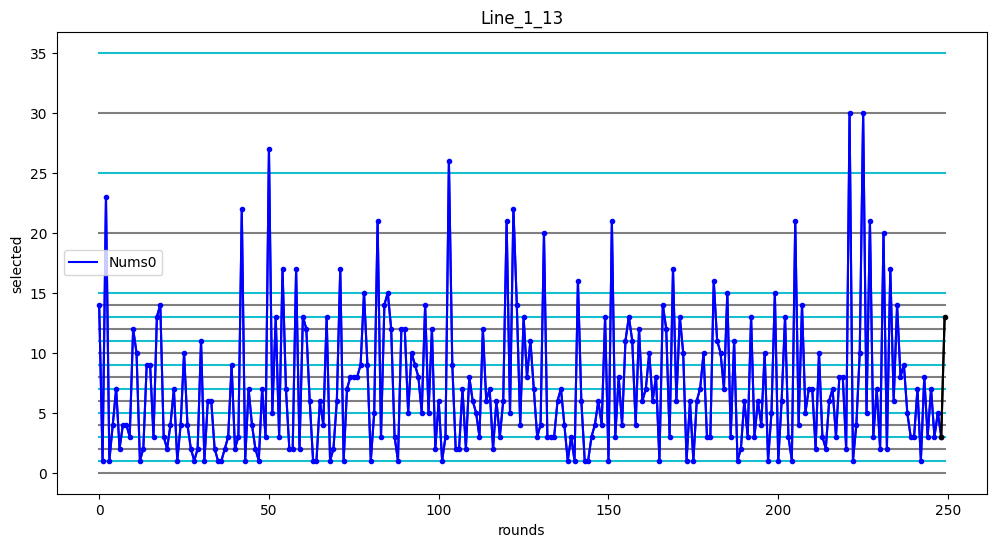

최소 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 30]
최대 값         = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 30]
사용자 선택       = 13
마지막 값        = 3
마지막 값들       = [8, 2, 30, 1, 4, 10, 30, 5, 21, 3, 7, 2, 20, 2, 17, 6, 14, 8, 9, 5, 3, 3, 7, 1, 8, 3, 7, 3, 5, 3]
자주 나오는 값(부분) = [(16, 1), (20, 1), (9, 1), (12, 2), (17, 2), (15, 2), (30, 2), (21, 3), (14, 3), (11, 4), (4, 5), (13, 5), (5, 5), (8, 6), (2, 6), (10, 7), (7, 9), (1, 10), (6, 10), (3, 16)]
자주 나오는 값(전체) = [(23, 1), (27, 1), (26, 1), (18, 2), (22, 2), (30, 2), (20, 3), (19, 4), (15, 5), (17, 7), (16, 7), (21, 7), (11, 10), (13, 13), (14, 14), (12, 16), (10, 16), (9, 16), (8, 19), (4, 27), (5, 27), (7, 27), (6, 32), (2, 43), (1, 46), (3, 51)]
마지막 수의 앞과 뒤  = [[14, 3, 4], [2, 3, 2], [6, 3, 1], [1, 3, 14], [12, 3, 14], [5, 3, 13], [9, 3, 2], [16, 3, 3], [3, 3, 9], [2, 3, 1], [8, 3, 3], [3, 3, 1], [2, 3, 2], [21, 3, 7], [2, 3, 3], [3, 3, 13], [4, 3, 7], [4, 3, 12], [9, 3, 13]

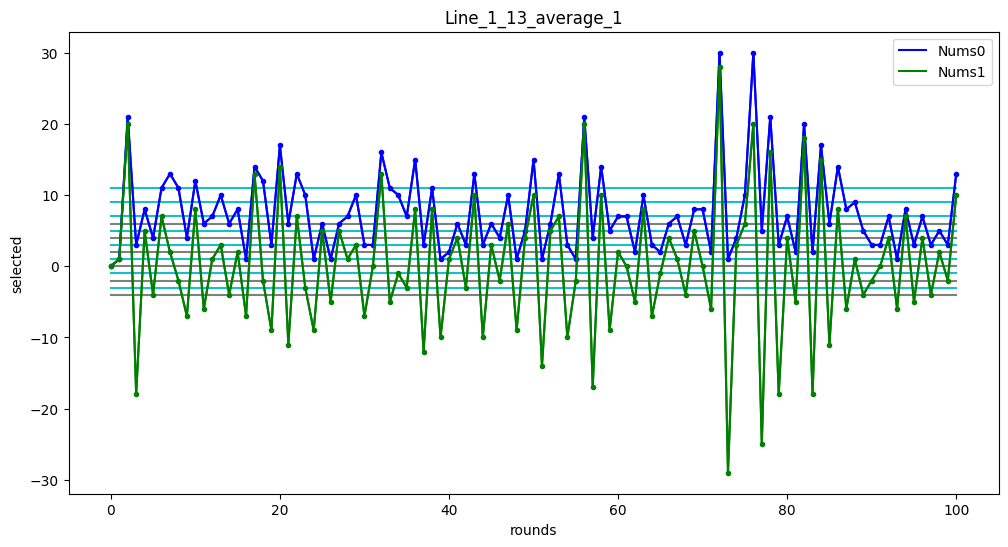

________________________________________
최소값          = [1.5, 2.0, 2.5, 3.0, 3.5]
최대값          = [13.5, 15.5, 16.0, 17.5, 20.0]
마지막          = [5.0, 5.0, 4.0, 4.0, 8.0]


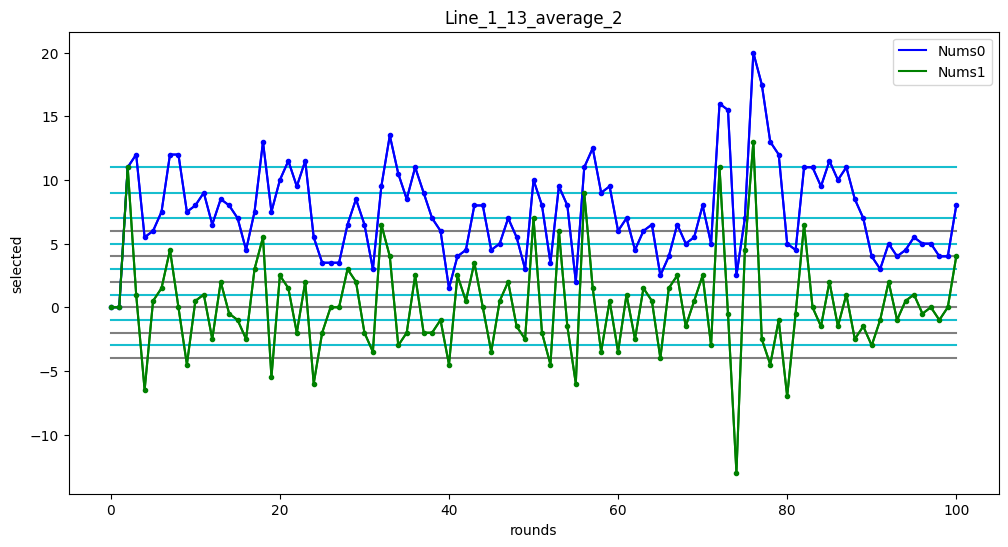

________________________________________
최소값          = [3.8, 4.2, 4.4, 4.6, 4.8]
최대값          = [11.8, 13.2, 13.8, 14.0, 15.0]
마지막          = [5.2, 4.4, 5.2, 4.2, 6.2]


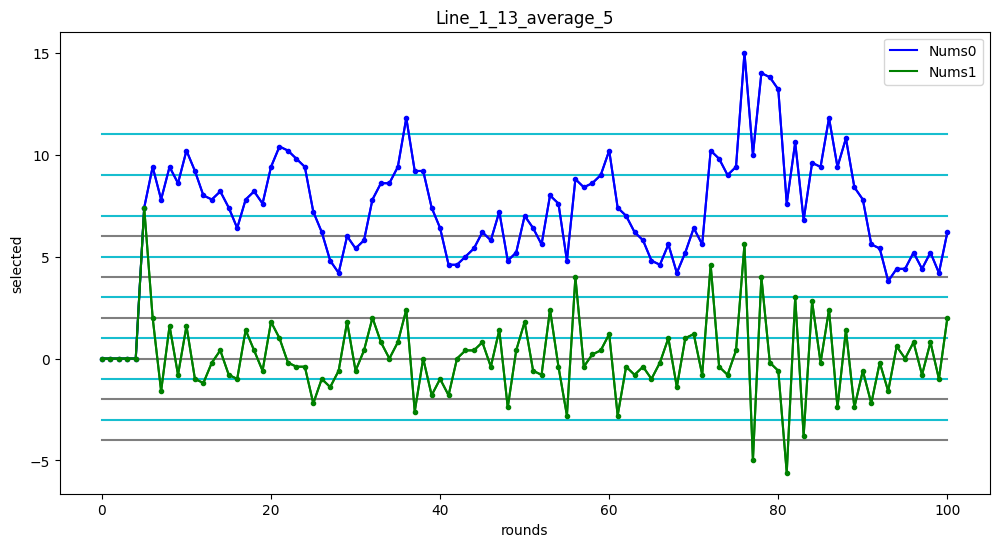

________________________________________
최소값          = [4.375, 4.625, 4.75, 4.875, 5.0]
최대값          = [11.25, 11.625, 12.25, 12.875, 13.0]
마지막          = [4.625, 4.375, 4.625, 4.625, 5.375]


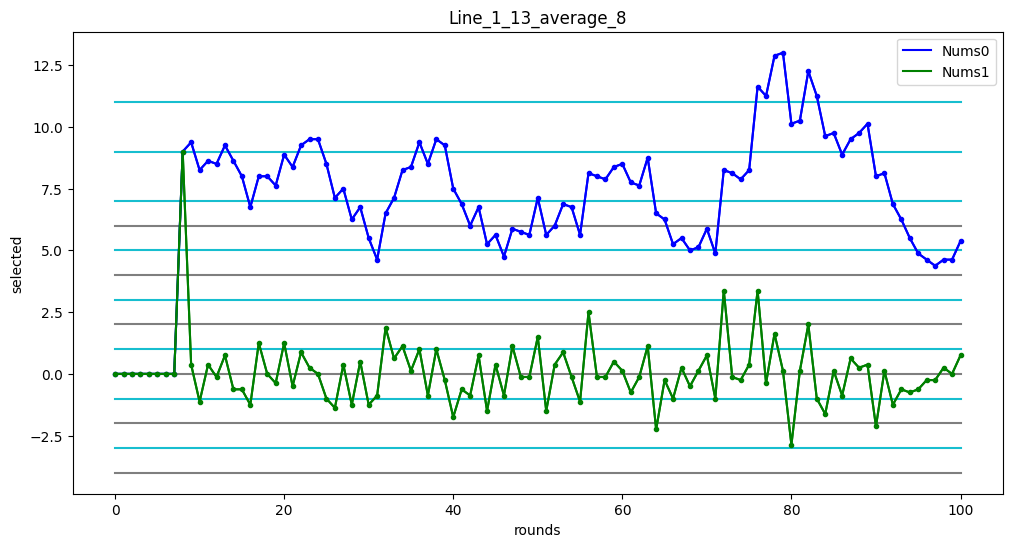

________________________________________
최소값          = [4.3, 4.5, 4.9, 5.1, 5.2]
최대값          = [10.4, 11.3, 11.4, 11.7, 11.9]
마지막          = [5.4, 4.9, 4.5, 4.3, 5.3]


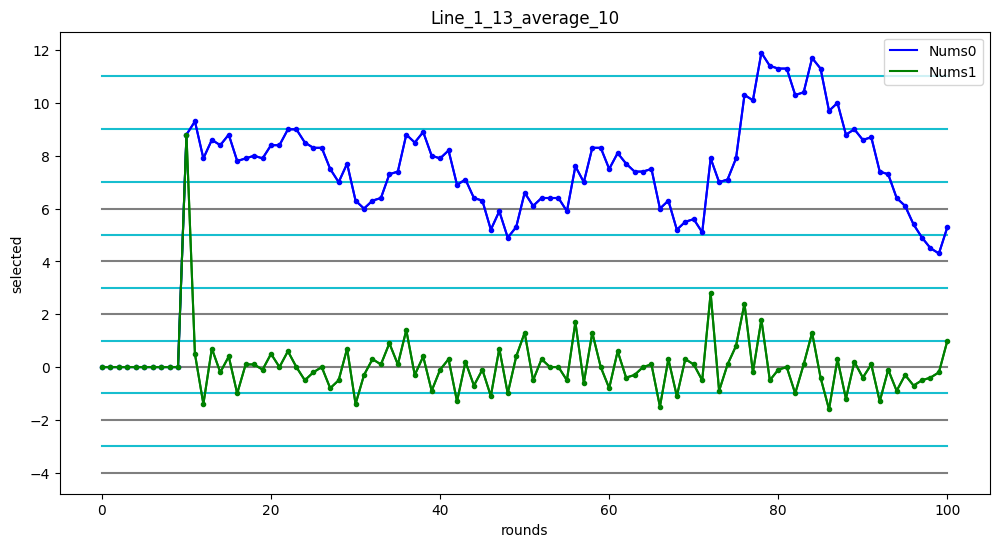

________________________________________
최소값          = [5.0, 5.230769230769231, 5.384615384615385, 5.769230769230769, 5.846153846153846]
최대값          = [10.846153846153847, 11.0, 11.076923076923077, 11.153846153846153, 11.692307692307692]
마지막          = [7.0, 5.923076923076923, 5.846153846153846, 5.0, 5.384615384615385]


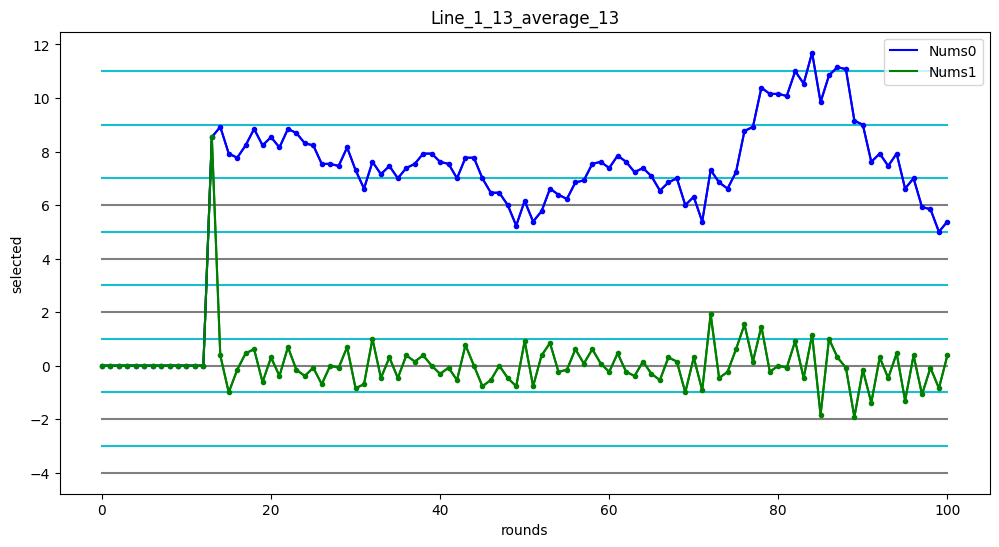

________________________________________
최소값          = [5.6, 5.666666666666667, 5.8, 5.866666666666666, 5.933333333333334]
최대값          = [10.533333333333333, 10.6, 10.666666666666666, 10.8, 11.466666666666667]
마지막          = [7.533333333333333, 6.4, 6.6, 5.666666666666667, 6.133333333333334]


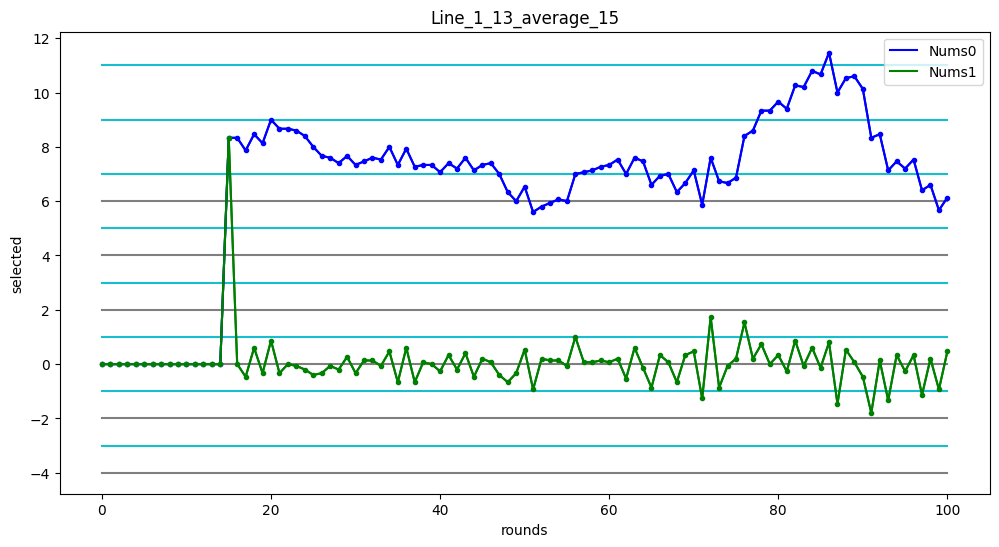

________________________________________
최소값          = [6.1, 6.4, 6.45, 6.55, 6.6]
최대값          = [9.95, 10.0, 10.05, 10.2, 10.35]
마지막          = [7.55, 7.45, 6.65, 6.65, 6.95]


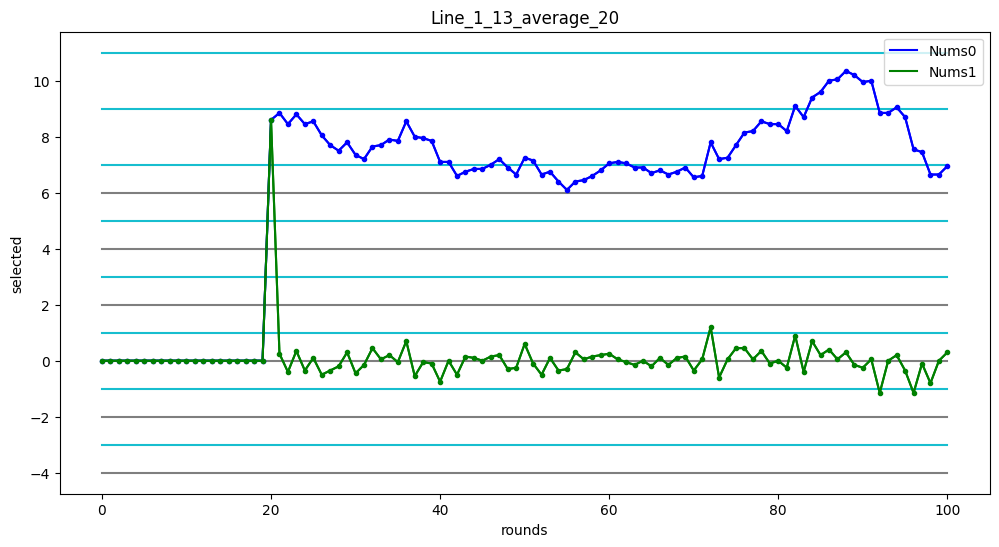

________________________________________
최소값          = [6.36, 6.52, 6.56, 6.6, 6.64]
최대값          = [9.04, 9.12, 9.16, 9.2, 9.24]
마지막          = [9.04, 7.96, 8.12, 8.08, 8.2]


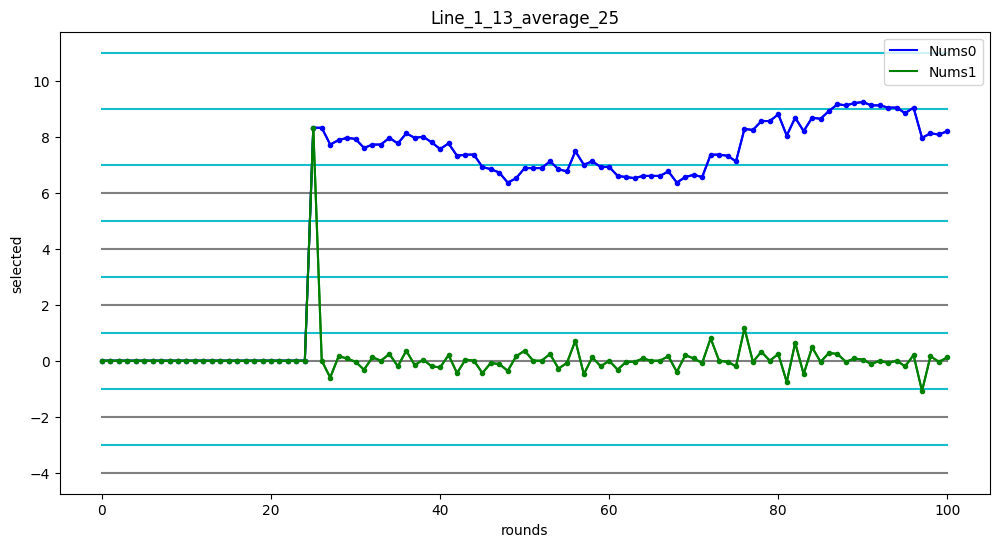

________________________________________
최소값          = [6.133333333333334, 6.266666666666667, 6.366666666666666, 6.4, 6.433333333333334]
최대값          = [8.633333333333333, 8.666666666666666, 8.733333333333333, 8.8, 8.9]
마지막          = [8.466666666666667, 8.333333333333334, 8.4, 8.233333333333333, 8.4]


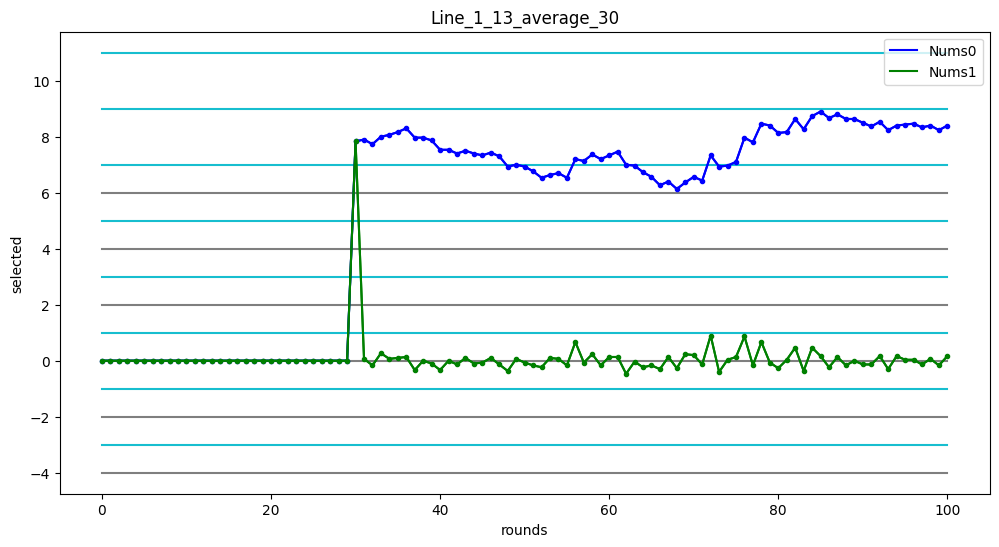

________________________________________
최소값          = [6.775, 6.825, 6.875, 6.9, 6.925]
최대값          = [8.3, 8.325, 8.35, 8.4, 8.55]
마지막          = [7.85, 7.825, 7.6, 7.55, 7.7]


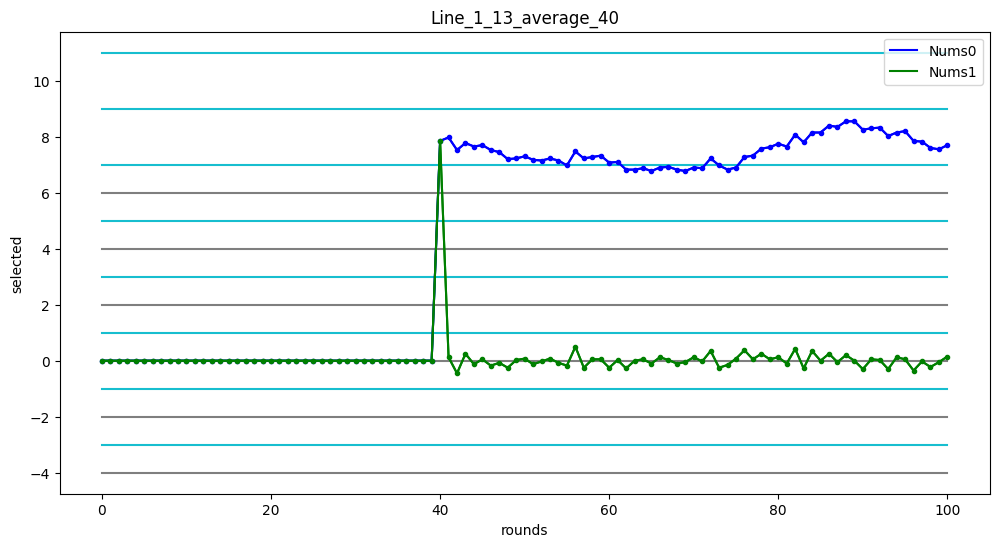

________________________________________
최소값          = [6.7, 6.78, 6.86, 6.92, 6.96]
최대값          = [7.84, 7.86, 7.9, 7.92, 7.94]
마지막          = [7.8, 7.66, 7.74, 7.7, 7.66]


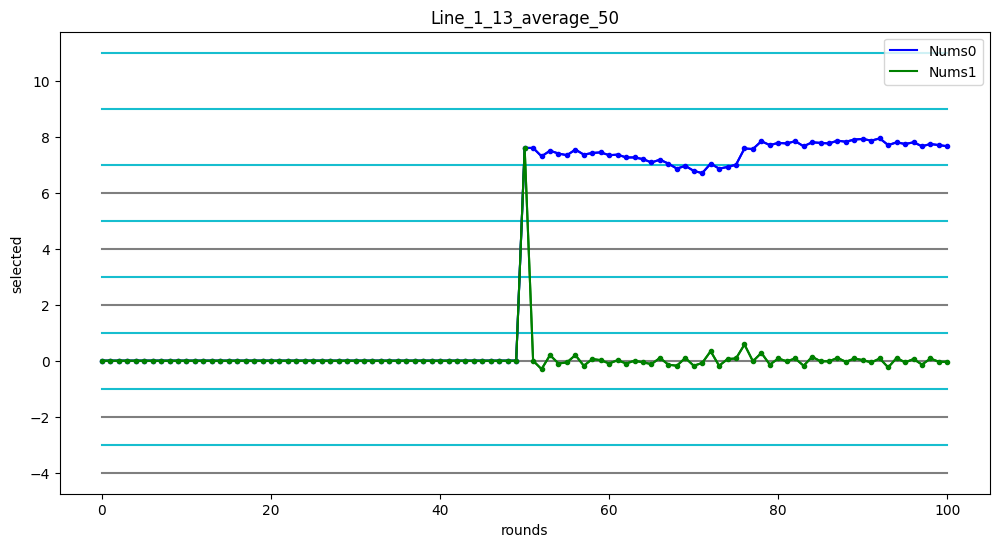

________________________________________
최소값          = [6.983333333333333, 7.05, 7.116666666666666, 7.183333333333334, 7.216666666666667]
최대값          = [7.766666666666667, 7.916666666666667, 7.933333333333334, 7.966666666666667, 8.0]
마지막          = [7.366666666666666, 7.366666666666666, 7.266666666666667, 7.3, 7.483333333333333]


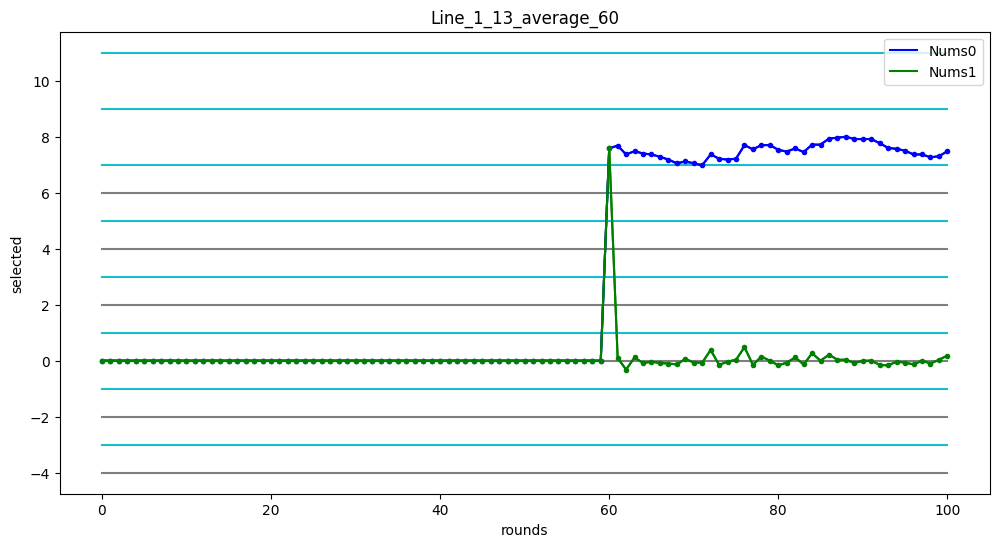

In [81]:
Round = 1
############################
selected = Round - 1
ext_data = 13
wanted_data_length = 30
helper_line_nums_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 9, 11]
lengths = [1, 2, 5, 8, 10, 13, 15, 20, 25, 30, 40, 50, 60]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1,
                save_fig=True
               )
candidate[selected] = ext_data

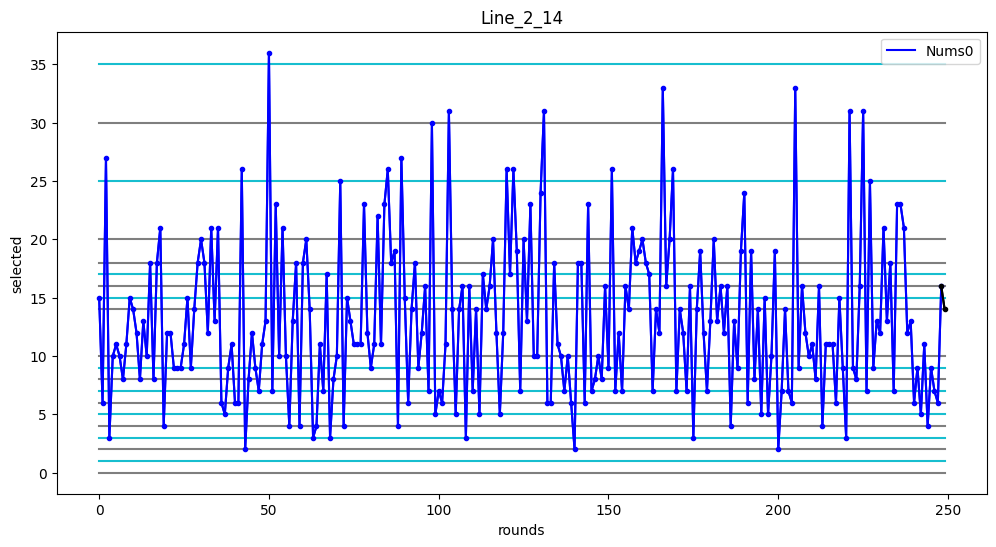

최소 값         = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
최대 값         = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 31, 33]
사용자 선택       = 14
마지막 값        = 16
마지막 값들       = [13, 12, 21, 13, 18, 7, 23, 23, 21, 12, 13, 6, 9, 5, 11, 4, 9, 7, 6, 16]
자주 나오는 값(부분) = [(3, 2), (15, 2), (10, 2), (31, 2), (23, 2), (21, 3), (18, 3), (20, 3), (4, 3), (8, 3), (5, 3), (19, 5), (6, 5), (11, 5), (13, 6), (14, 7), (9, 8), (12, 8), (16, 9), (7, 11)]
자주 나오는 값(전체) = [(23, 8), (20, 9), (3, 10), (19, 10), (17, 12), (5, 12), (8, 16), (4, 16), (21, 17), (13, 17), (15, 19), (12, 20), (14, 20), (16, 21), (9, 23), (18, 24), (10, 24), (6, 25), (11, 26), (7, 27)]
마지막 수의 앞과 뒤  = [[-1, 16, 18], [15, 16, 11], [8, 16, 18], [18, 16, 2], [22, 16, 17], [27, 16, 24], [24, 16, 15], [12, 16, 7], [14, 16, 3], [3, 16, 7], [14, 16, 20], [8, 16, 9], [7, 16, 14], [33, 16, 20], [7, 16, 3], [13, 16, 12], [12, 16, 4], [9, 16, 12], [8, 16, 4], [8, 16, 31], [6, 16, -1]]
____

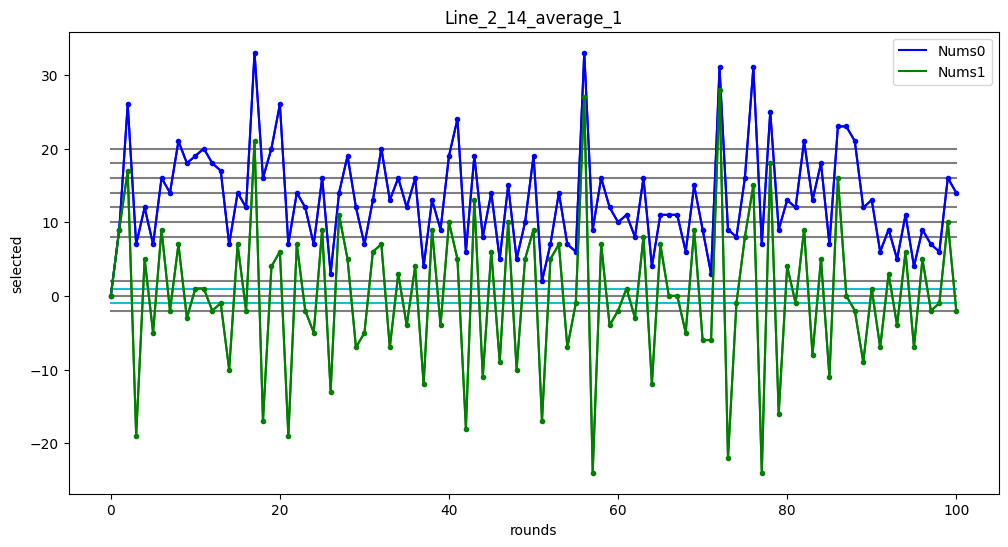

________________________________________
최소값          = [4.5, 6.0, 6.5, 7.0, 7.5]
최대값          = [22.0, 22.5, 23.0, 23.5, 24.5]
마지막          = [6.5, 8.0, 6.5, 11.0, 15.0]


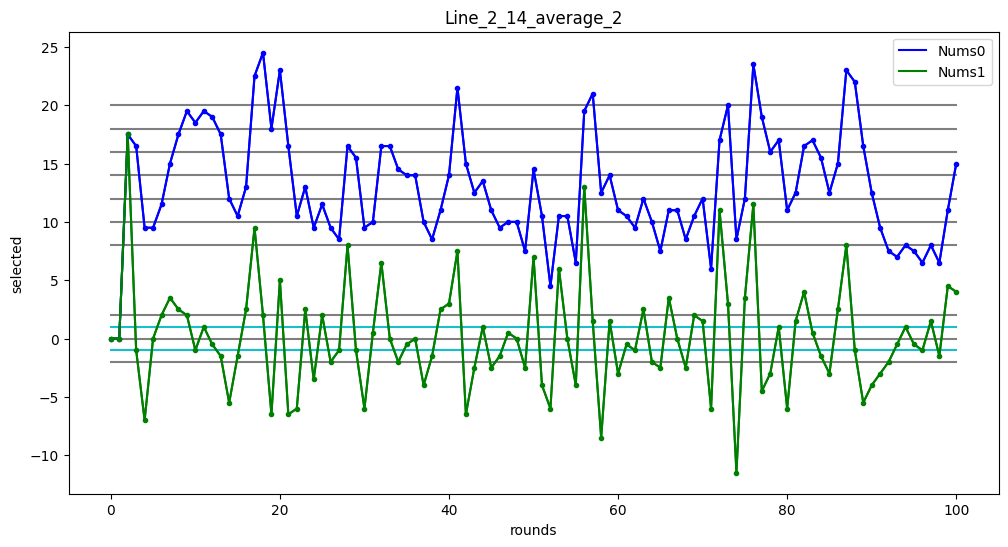

________________________________________
최소값          = [7.0, 7.2, 7.4, 7.6, 8.4]
최대값          = [18.4, 19.0, 19.2, 20.4, 21.4]
마지막          = [7.6, 7.2, 7.4, 8.4, 10.4]


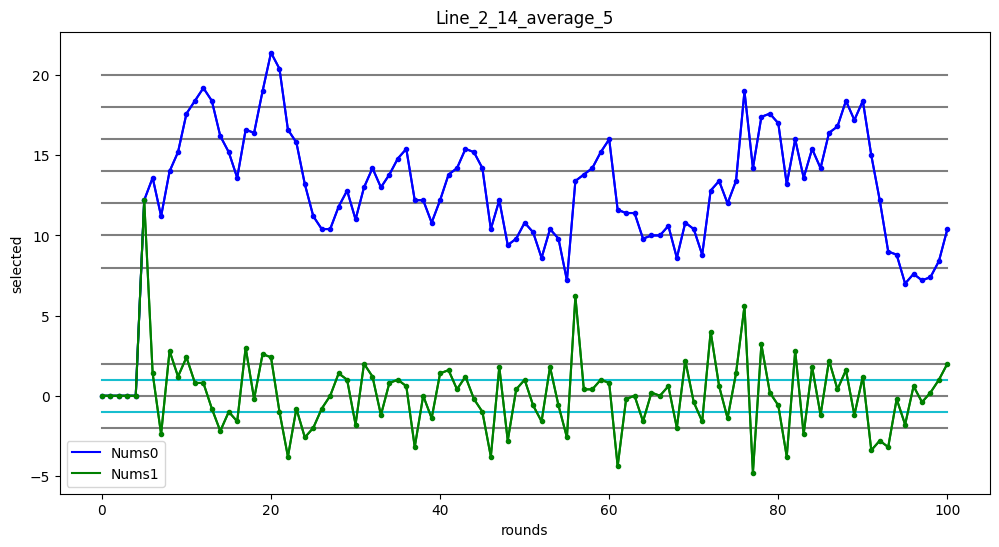

________________________________________
최소값          = [7.125, 8.0, 8.375, 8.625, 8.75]
최대값          = [17.25, 17.5, 17.75, 17.875, 18.125]
마지막          = [8.625, 8.0, 7.125, 8.375, 9.0]


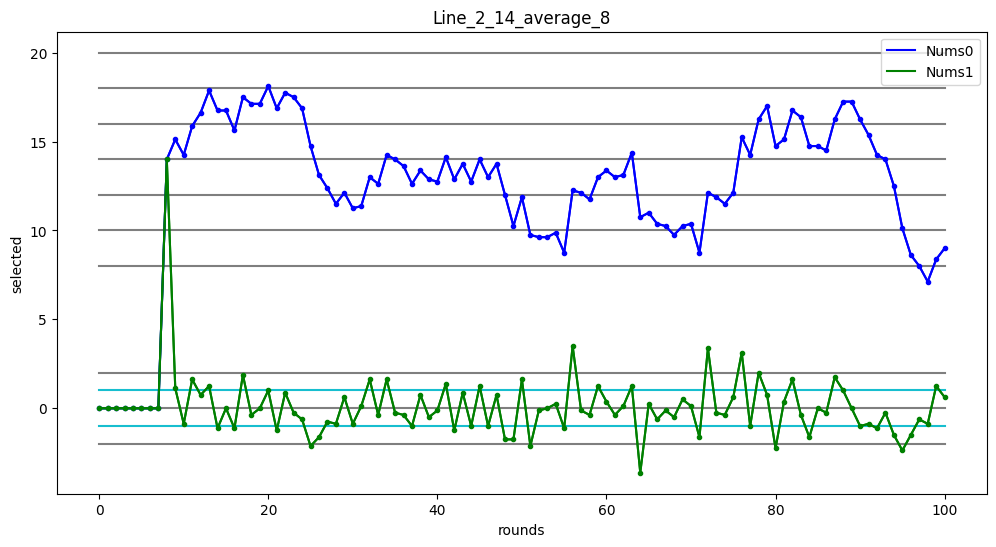

________________________________________
최소값          = [8.2, 8.6, 8.7, 9.0, 9.4]
최대값          = [17.0, 17.4, 17.6, 17.9, 18.3]
마지막          = [11.3, 9.7, 8.2, 8.6, 8.7]


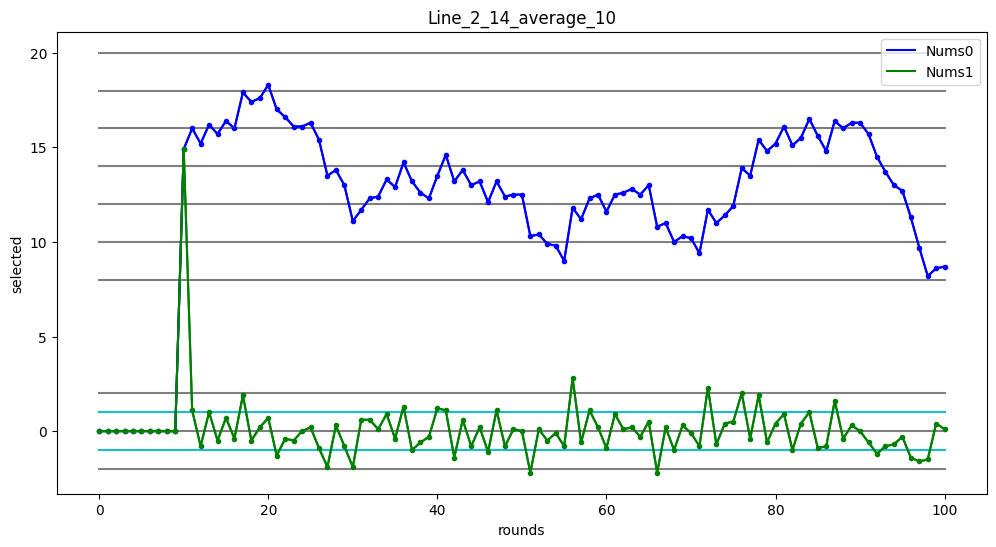

________________________________________
최소값          = [9.76923076923077, 10.076923076923077, 10.23076923076923, 10.76923076923077, 10.923076923076923]
최대값          = [17.153846153846153, 17.307692307692307, 17.46153846153846, 17.615384615384617, 18.53846153846154]
마지막          = [12.384615384615385, 11.538461538461538, 11.461538461538462, 10.923076923076923, 10.23076923076923]


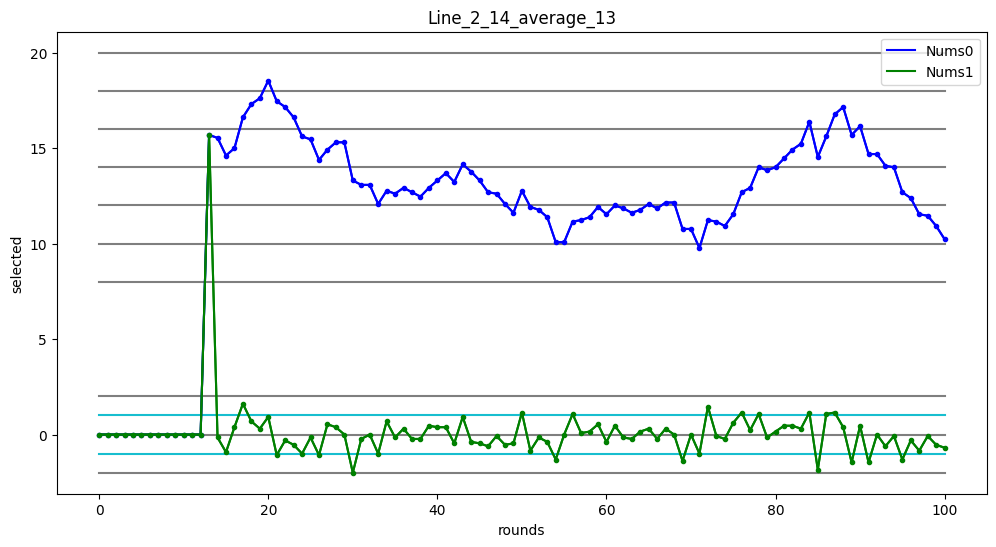

________________________________________
최소값          = [10.133333333333333, 10.733333333333333, 10.866666666666667, 11.066666666666666, 11.133333333333333]
최대값          = [16.733333333333334, 16.8, 16.866666666666667, 17.466666666666665, 18.066666666666666]
마지막          = [13.0, 12.066666666666666, 11.6, 11.466666666666667, 11.933333333333334]


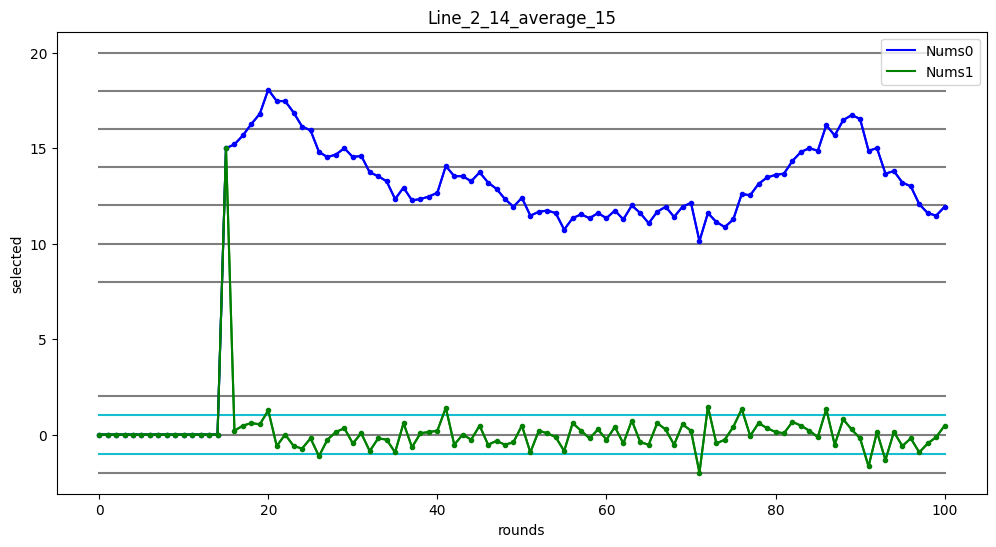

________________________________________
최소값          = [10.9, 10.95, 11.0, 11.1, 11.15]
최대값          = [15.9, 16.15, 16.35, 16.5, 16.6]
마지막          = [13.05, 13.05, 12.1, 12.45, 12.5]


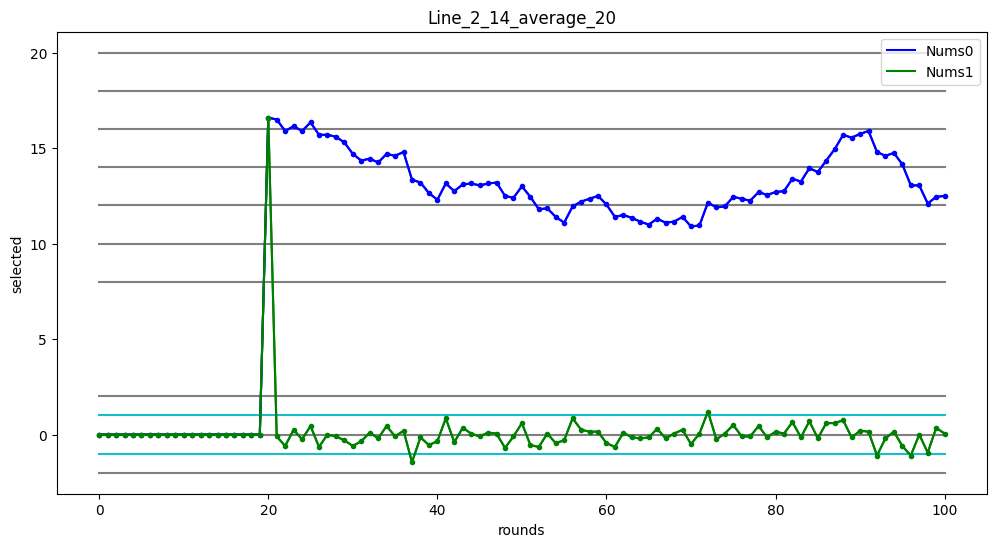

________________________________________
최소값          = [10.8, 10.88, 11.08, 11.12, 11.32]
최대값          = [15.08, 15.16, 15.28, 15.4, 15.52]
마지막          = [14.24, 13.28, 13.16, 13.48, 13.4]


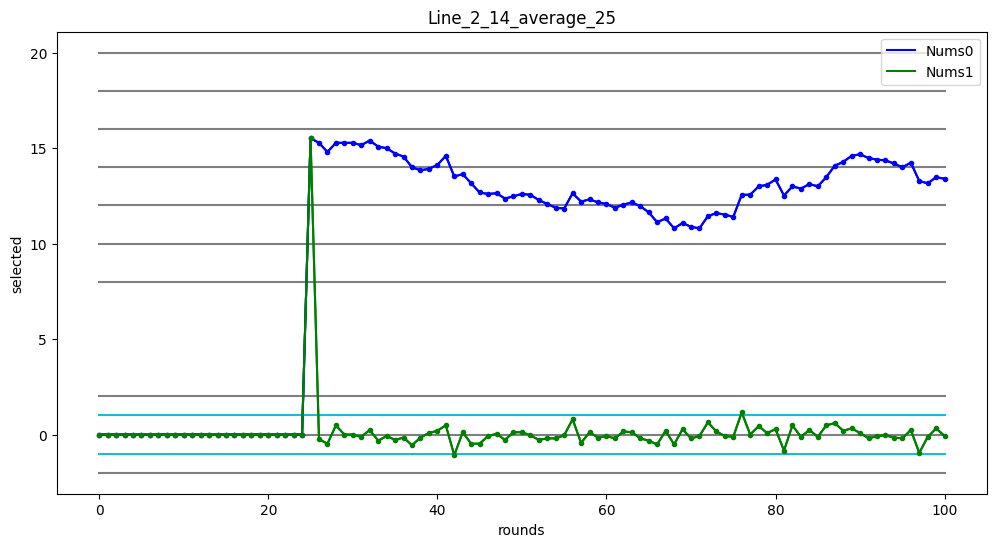

________________________________________
최소값          = [10.733333333333333, 11.233333333333333, 11.3, 11.433333333333334, 11.566666666666666]
최대값          = [14.766666666666667, 14.866666666666667, 14.9, 15.033333333333333, 15.2]
마지막          = [13.333333333333334, 13.2, 13.2, 13.233333333333333, 13.4]


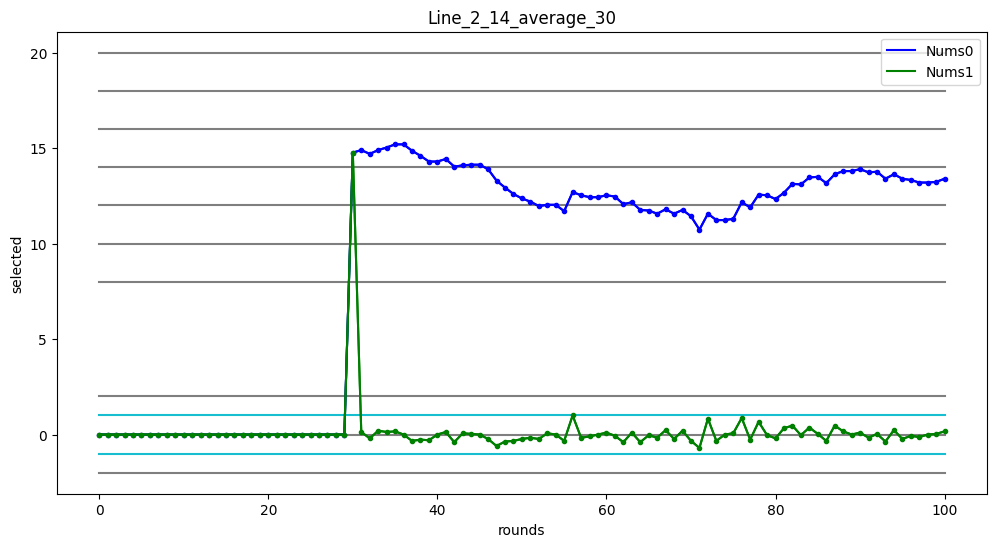

________________________________________
최소값          = [11.675, 11.7, 11.775, 11.825, 11.875]
최대값          = [14.45, 14.525, 14.625, 14.7, 14.825]
마지막          = [12.7, 12.65, 12.4, 12.5, 12.6]


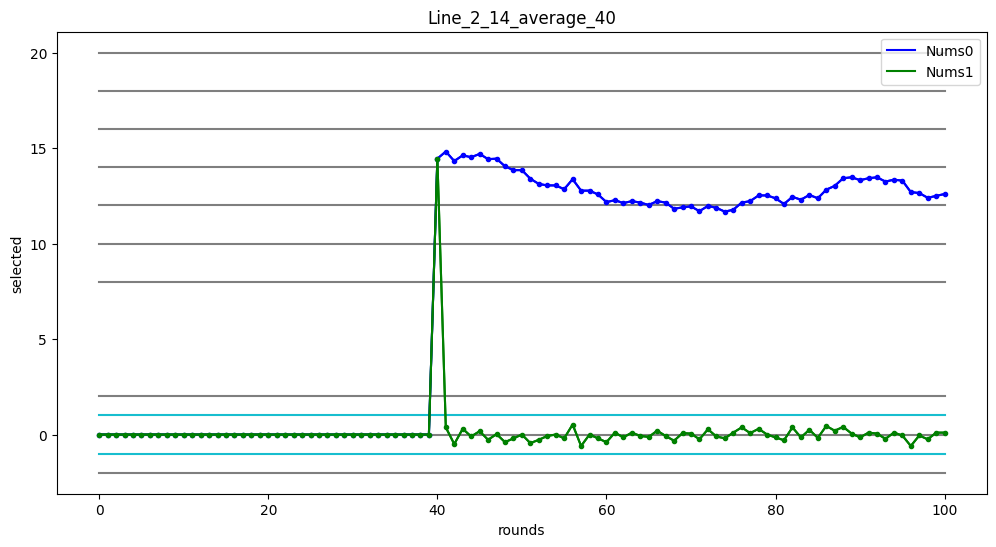

________________________________________
최소값          = [11.7, 11.78, 11.98, 12.0, 12.04]
최대값          = [13.7, 13.8, 13.9, 13.92, 14.06]
마지막          = [12.52, 12.36, 12.38, 12.5, 12.4]


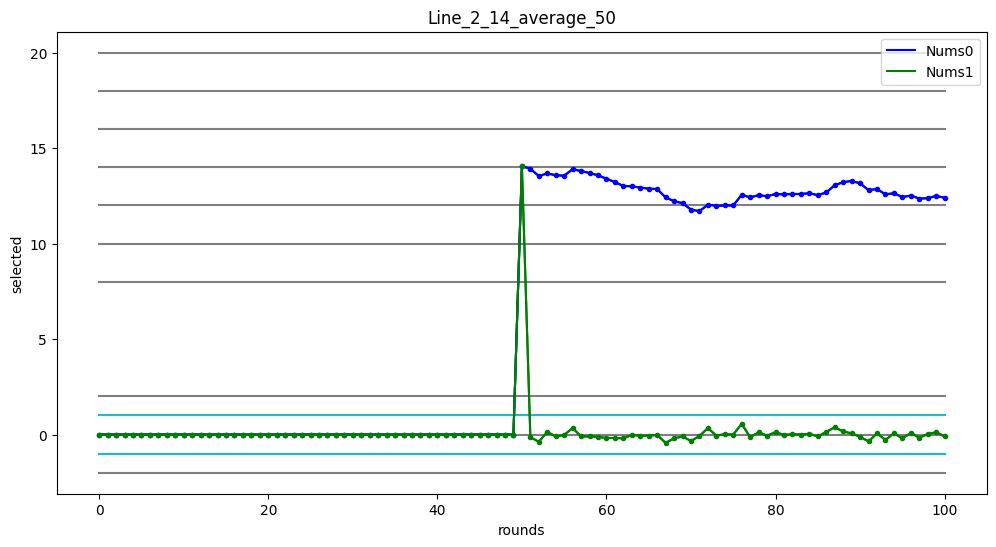

________________________________________
최소값          = [12.35, 12.383333333333333, 12.416666666666666, 12.433333333333334, 12.45]
최대값          = [13.4, 13.466666666666667, 13.533333333333333, 13.65, 13.683333333333334]
마지막          = [12.45, 12.5, 12.383333333333333, 12.5, 12.416666666666666]


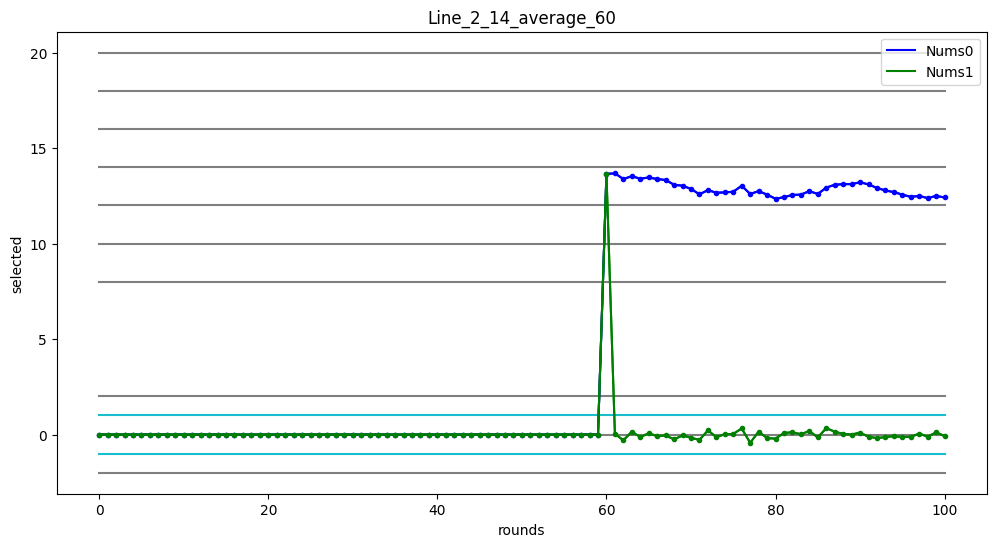

In [79]:
Round = 2
###########################
selected = Round - 1
ext_data = 14
wanted_data_length = 20
helper_line_nums_1 = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 25, 30, 35]
helper_line_nums_2 = [-2, -1, 0, 1, 2, 8, 10, 12, 14, 16, 18, 20]
lengths = [1, 2, 5, 8, 10, 13, 15, 20, 25, 30, 40, 50, 60]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1,
                save_fig=True
               )
candidate[selected] = ext_data

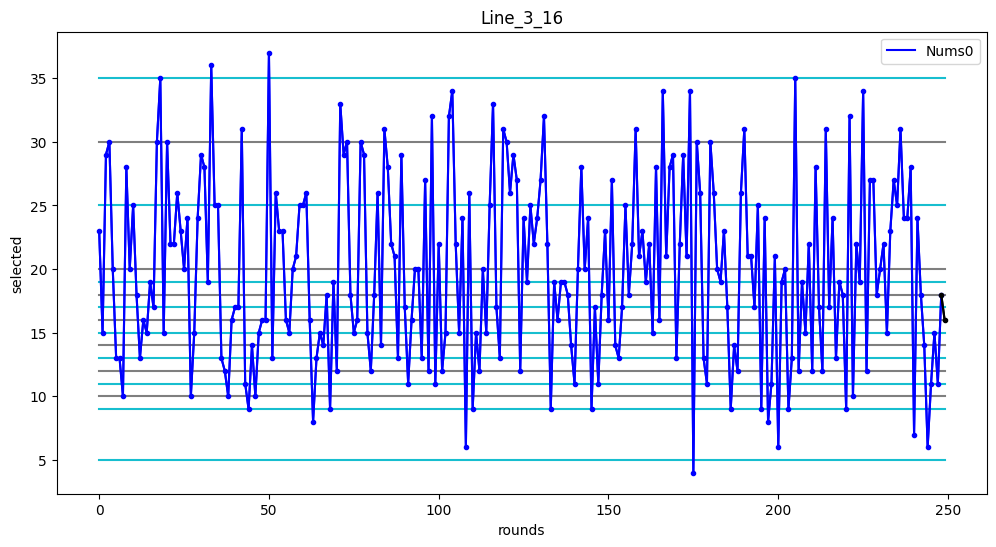

최소 값         = [4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
최대 값         = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35]
사용자 선택       = 16
마지막 값        = 18
마지막 값들       = [18, 20, 22, 15, 23, 27, 25, 31, 24, 24, 28, 7, 24, 18, 14, 6, 11, 15, 11, 18]
자주 나오는 값(부분) = [(14, 3), (25, 3), (23, 3), (34, 3), (26, 3), (20, 3), (27, 4), (31, 4), (15, 4), (28, 4), (11, 4), (9, 4), (13, 5), (17, 5), (18, 5), (12, 5), (24, 5), (22, 6), (21, 6), (19, 6)]
자주 나오는 값(전체) = [(21, 12), (26, 12), (14, 12), (31, 13), (29, 13), (25, 14), (30, 14), (23, 15), (11, 15), (28, 17), (20, 17), (24, 17), (22, 18), (15, 19), (17, 19), (18, 20), (16, 21), (19, 22), (13, 24), (12, 25)]
마지막 수의 앞과 뒤  = [[-1, 18, 31], [21, 18, 13], [23, 18, 31], [30, 18, 13], [35, 18, 19], [21, 18, 11], [12, 18, 16], [13, 18, 34], [32, 18, 22], [25, 18, 13], [14, 18, 9], [30, 18, 15], [12, 18, 26], [19, 18, 14], [11, 18, 23], [25, 18, 22], [19, 18, 9], [27, 18, 20], [24, 1

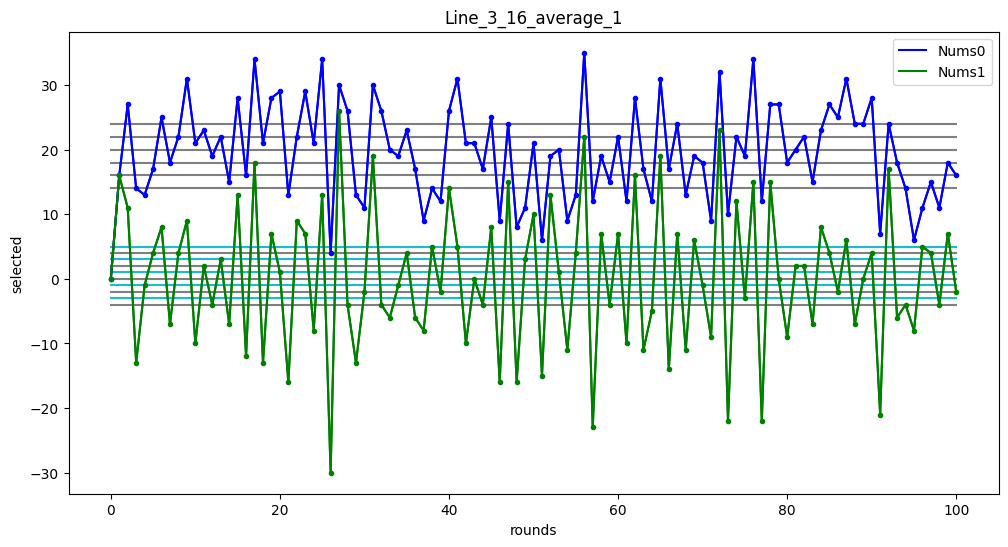

________________________________________
최소값          = [8.5, 9.5, 10.0, 11.0, 11.5]
최대값          = [26.5, 27.0, 27.5, 28.0, 28.5]
마지막          = [8.5, 13.0, 13.0, 14.5, 17.0]


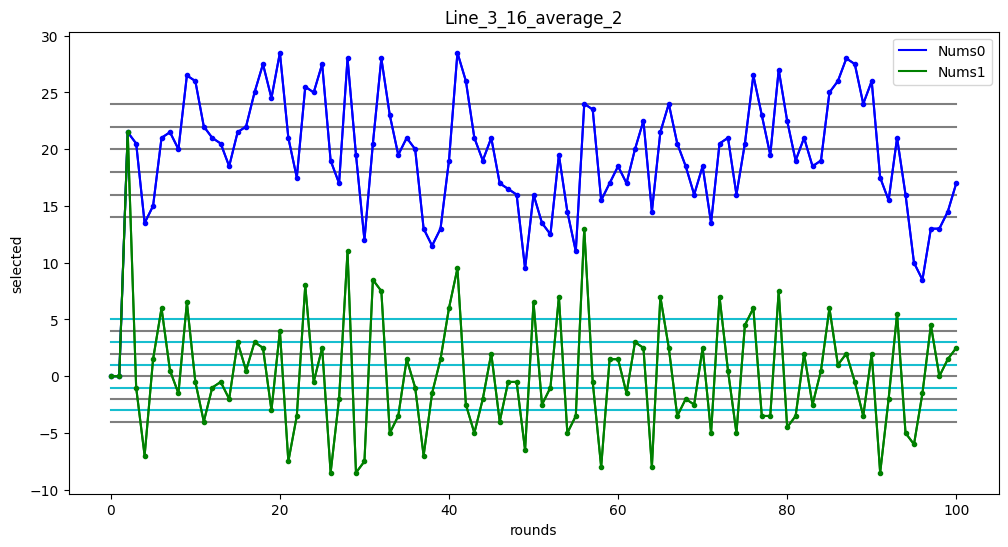

________________________________________
최소값          = [11.4, 12.2, 12.8, 13.0, 13.4]
최대값          = [25.4, 25.6, 26.0, 26.2, 26.4]
마지막          = [14.6, 12.8, 11.4, 12.2, 14.2]


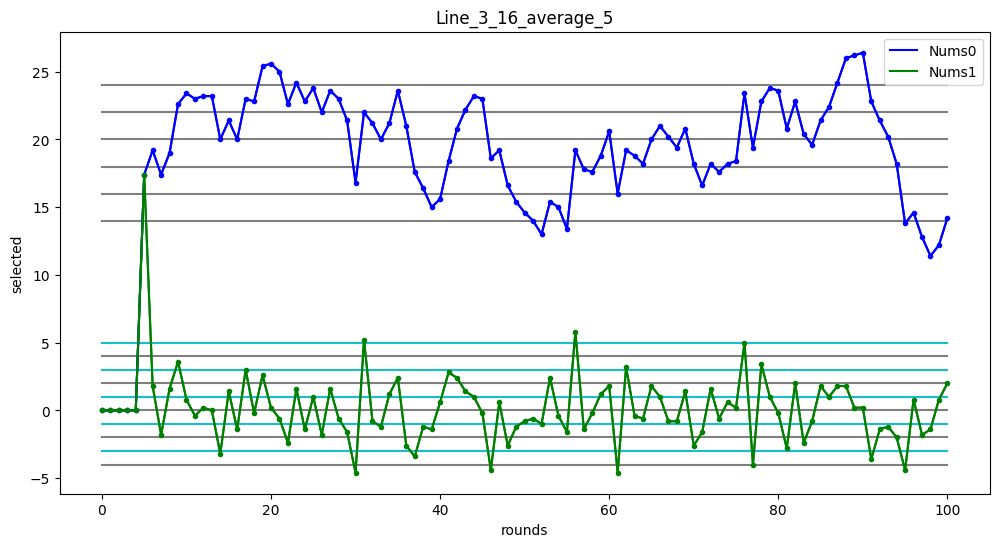

________________________________________
최소값          = [13.25, 13.375, 13.625, 14.625, 14.75]
최대값          = [23.75, 23.875, 24.0, 24.125, 24.625]
마지막          = [16.5, 15.375, 13.25, 14.625, 13.625]


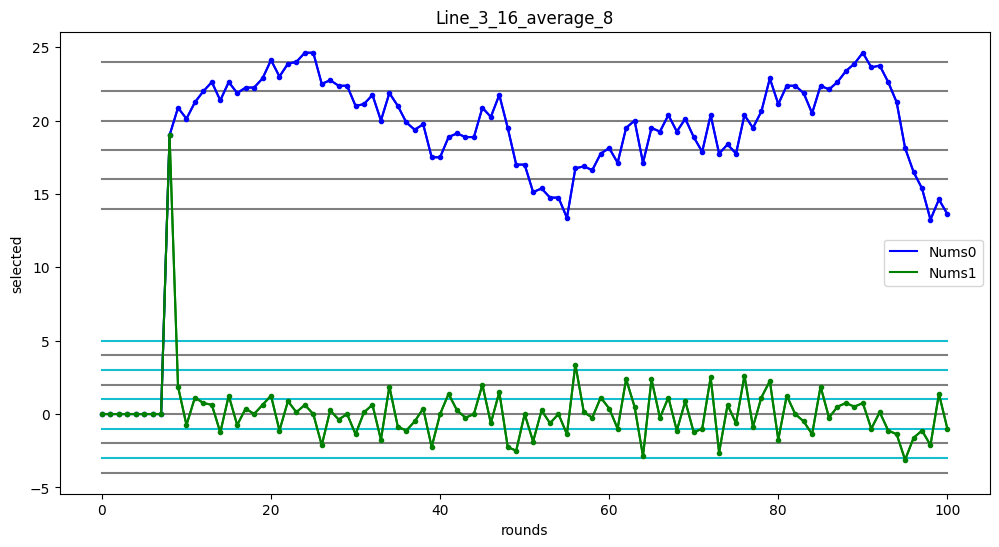

________________________________________
최소값          = [14.0, 15.2, 15.4, 15.8, 16.0]
최대값          = [23.5, 23.6, 23.9, 24.1, 24.7]
마지막          = [18.7, 17.1, 15.8, 15.2, 14.0]


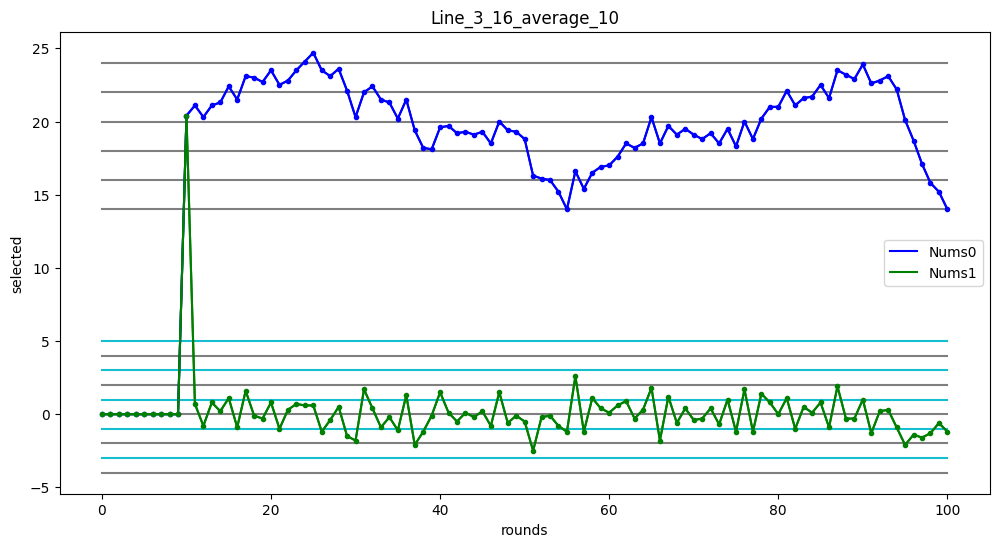

________________________________________
최소값          = [15.615384615384615, 15.846153846153847, 16.153846153846153, 16.23076923076923, 16.307692307692307]
최대값          = [23.46153846153846, 23.615384615384617, 23.76923076923077, 23.923076923076923, 24.0]
마지막          = [20.153846153846153, 19.53846153846154, 18.307692307692307, 17.76923076923077, 16.615384615384617]


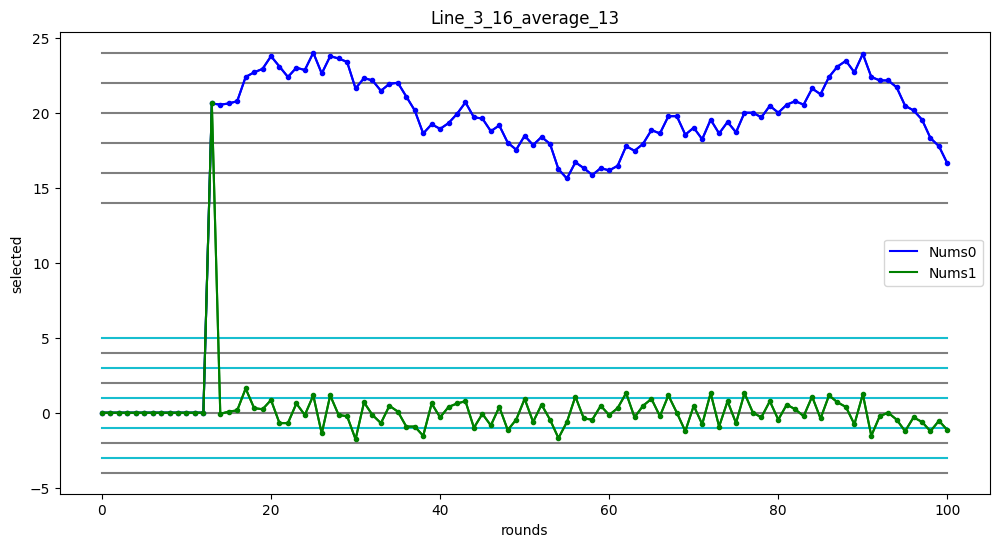

________________________________________
최소값          = [16.2, 16.4, 16.533333333333335, 16.666666666666668, 17.0]
최대값          = [23.333333333333332, 23.4, 23.466666666666665, 23.6, 23.8]
마지막          = [19.933333333333334, 19.466666666666665, 19.2, 18.866666666666667, 18.133333333333333]


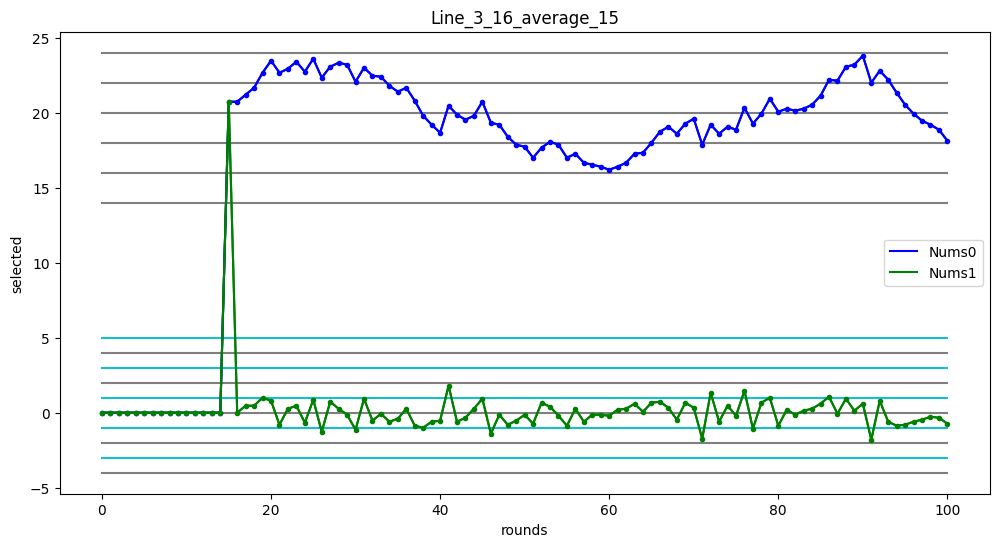

________________________________________
최소값          = [16.65, 16.85, 16.95, 17.1, 17.15]
최대값          = [22.6, 22.7, 23.1, 23.3, 23.55]
마지막          = [20.15, 20.3, 19.5, 19.05, 18.95]


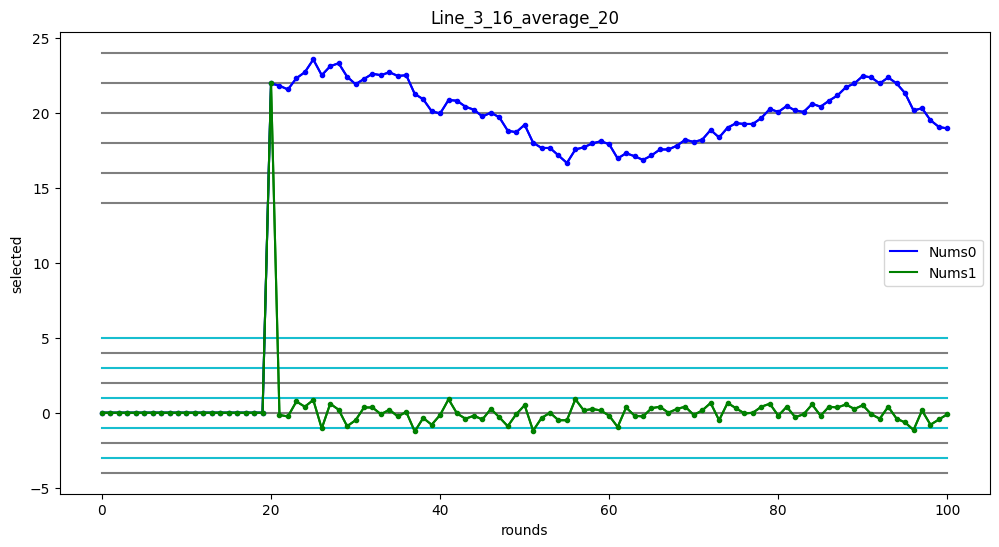

________________________________________
최소값          = [17.24, 17.36, 17.44, 17.48, 17.56]
최대값          = [22.32, 22.4, 22.44, 22.64, 22.72]
마지막          = [20.8, 20.12, 20.16, 20.0, 19.88]


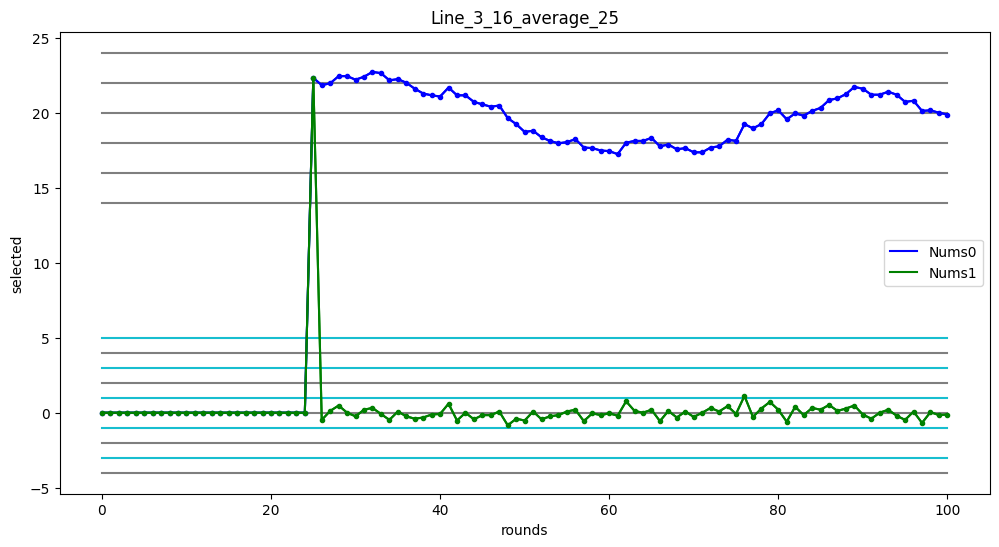

________________________________________
최소값          = [17.533333333333335, 17.566666666666666, 17.6, 17.733333333333334, 17.833333333333332]
최대값          = [21.866666666666667, 22.033333333333335, 22.166666666666668, 22.233333333333334, 22.433333333333334]
마지막          = [20.1, 19.8, 19.733333333333334, 19.7, 19.633333333333333]


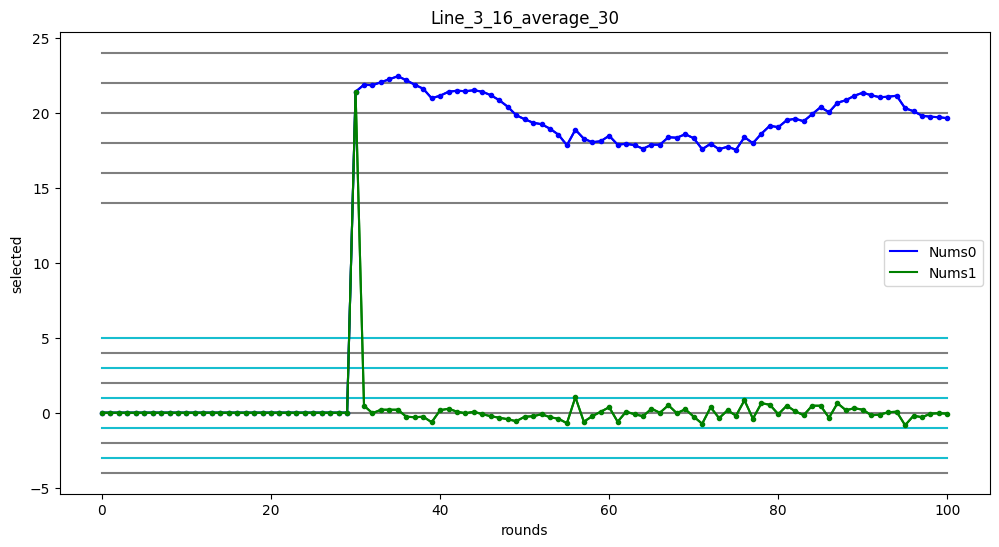

In [85]:
Round = 3
############################
selected = Round - 1
ext_data = 16
wanted_data_length = 20
helper_line_nums_1 = [5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30, 35]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 14, 16, 18, 20, 22, 24]
lengths = [1, 2, 5, 8, 10, 13, 15, 20, 25, 30]
start_pos_0 = 150
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

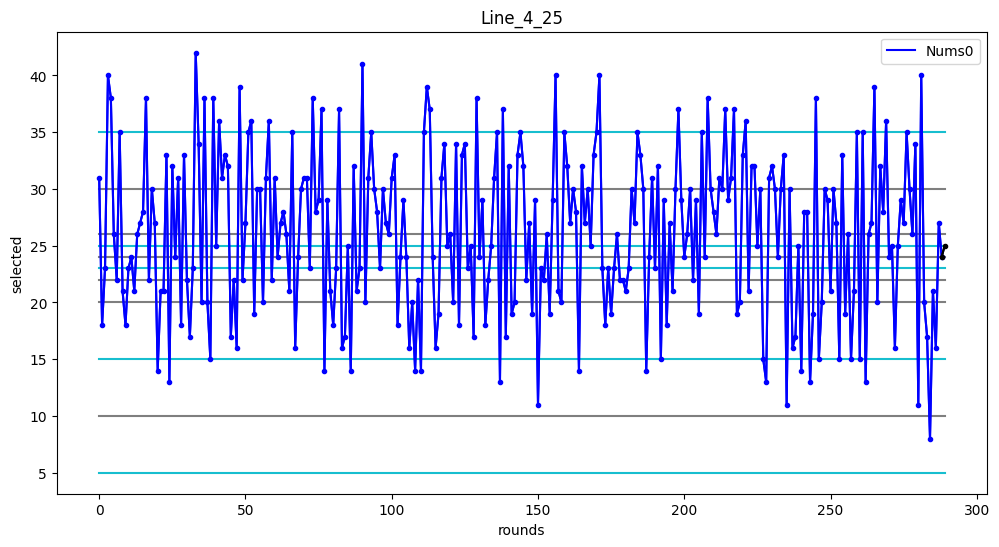

최소 값         = [8, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
최대 값         = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
사용자 선택       = 25
마지막 값        = 24
마지막 값들       = [36, 24, 25, 16, 25, 29, 27, 35, 30, 26, 34, 11, 40, 20, 17, 8, 21, 16, 27, 24]
자주 나오는 값(부분) = [(11, 2), (17, 2), (37, 3), (31, 3), (33, 3), (13, 3), (16, 3), (19, 4), (35, 4), (28, 4), (20, 4), (32, 5), (27, 5), (21, 5), (24, 5), (26, 5), (25, 5), (15, 6), (29, 6), (30, 11)]
자주 나오는 값(전체) = [(16, 10), (14, 11), (20, 13), (18, 13), (38, 13), (19, 15), (25, 15), (33, 15), (28, 16), (23, 16), (24, 17), (22, 17), (21, 17), (29, 17), (27, 18), (32, 18), (31, 19), (35, 19), (26, 23), (30, 25)]
마지막 수의 앞과 뒤  = [[17, 24, 25], [30, 24, 24], [24, 24, 26], [23, 24, 21], [32, 24, 31], [31, 24, 27], [16, 24, 30], [18, 24, 29], [29, 24, 16], [37, 24, 16], [38, 24, 29], [14, 24, 31], [29, 24, 26], [35, 24, 38], [30, 24, 30], [36, 24, 25], [27, 24, -1]]
___________

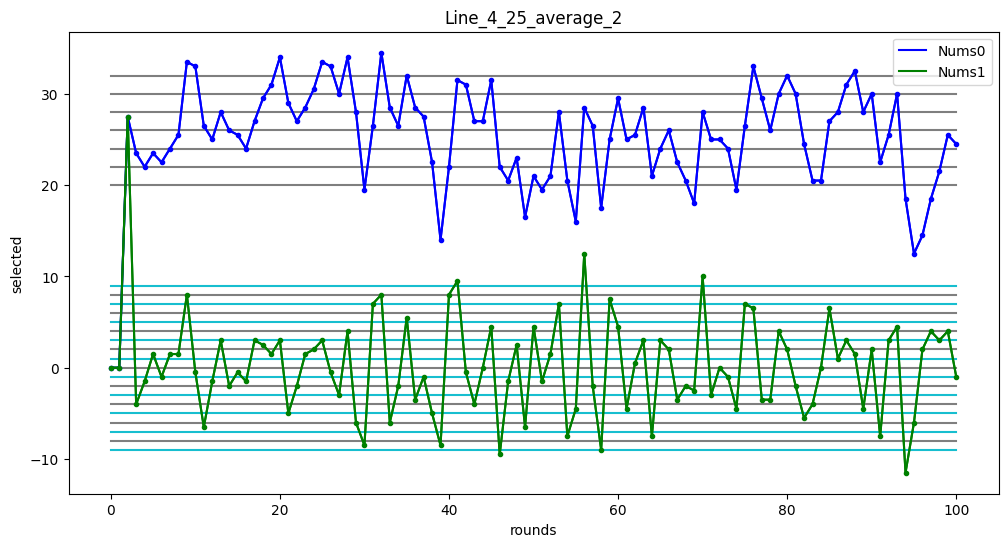

________________________________________
최소값          = [16.4, 17.8, 19.2, 19.8, 20.0]
최대값          = [30.6, 30.8, 31.0, 31.6, 32.8]
마지막          = [21.2, 16.4, 17.8, 19.2, 22.6]


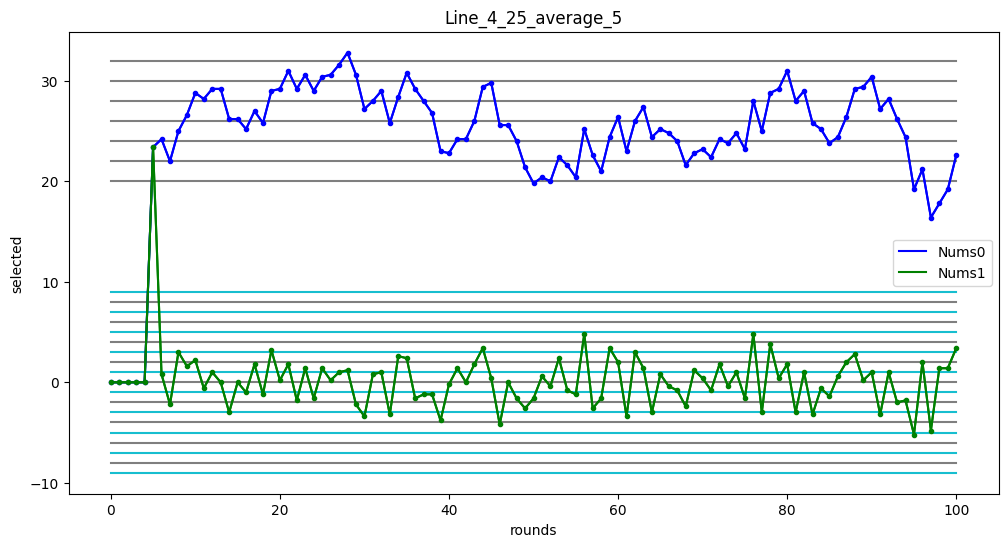

________________________________________
최소값          = [19.75, 20.0, 20.875, 21.125, 21.375]
최대값          = [29.5, 30.0, 30.25, 30.5, 31.125]
마지막          = [22.125, 20.875, 20.0, 21.625, 19.75]


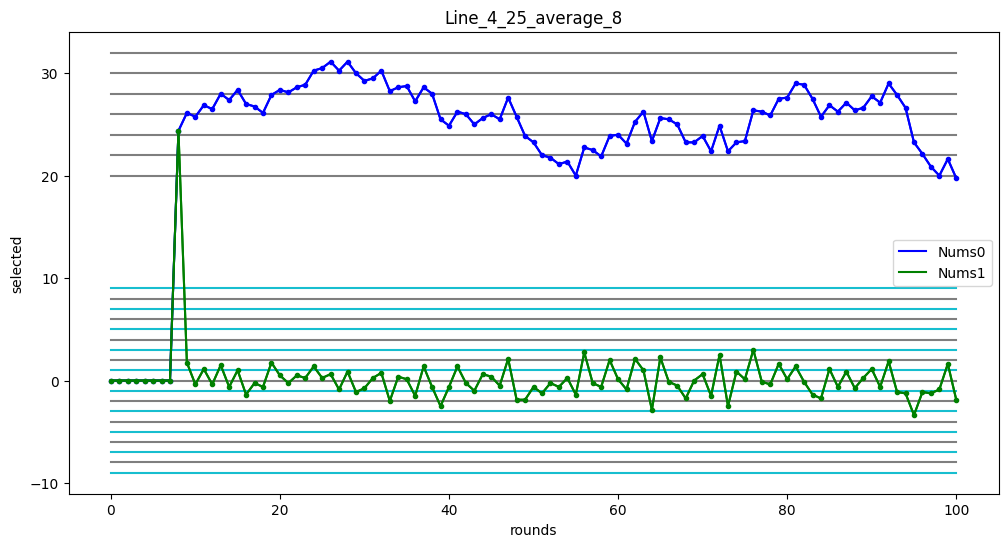

________________________________________
최소값          = [20.1, 20.9, 21.3, 21.5, 21.7]
최대값          = [29.8, 30.3, 30.4, 30.8, 31.7]
마지막          = [24.2, 22.3, 22.0, 21.8, 20.9]


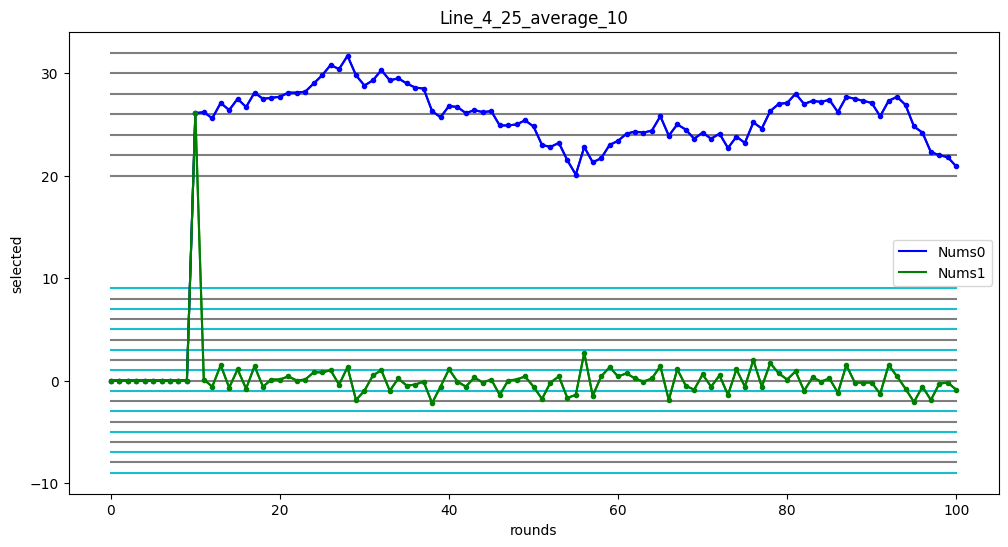

________________________________________
최소값          = [21.076923076923077, 22.076923076923077, 22.153846153846153, 22.46153846153846, 22.53846153846154]
최대값          = [29.384615384615383, 29.76923076923077, 29.846153846153847, 29.923076923076923, 30.384615384615383]
마지막          = [24.846153846153847, 24.153846153846153, 24.0, 23.76923076923077, 23.0]


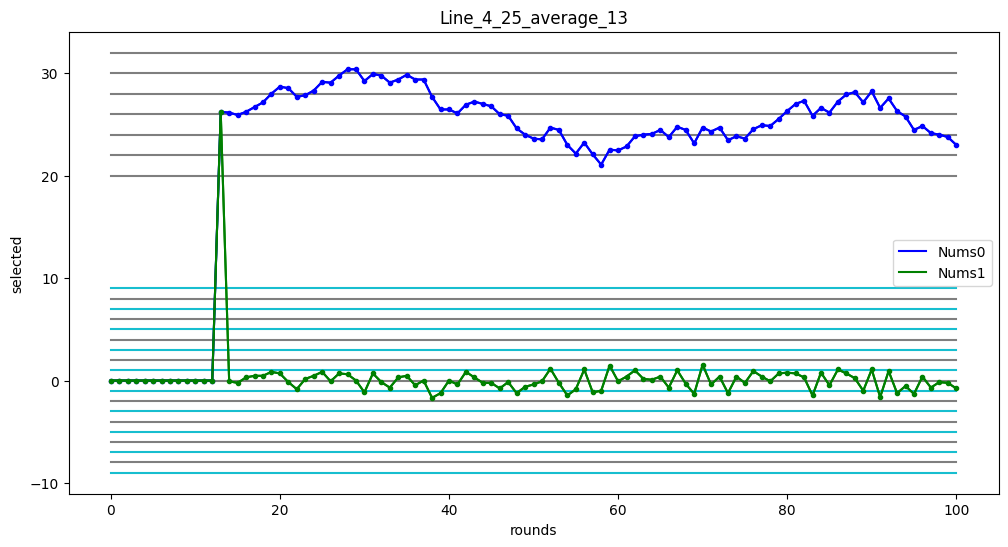

________________________________________
최소값          = [22.2, 22.466666666666665, 22.733333333333334, 22.866666666666667, 23.266666666666666]
최대값          = [29.466666666666665, 29.533333333333335, 29.733333333333334, 29.866666666666667, 29.933333333333334]
마지막          = [24.266666666666666, 23.666666666666668, 24.4, 24.333333333333332, 24.066666666666666]


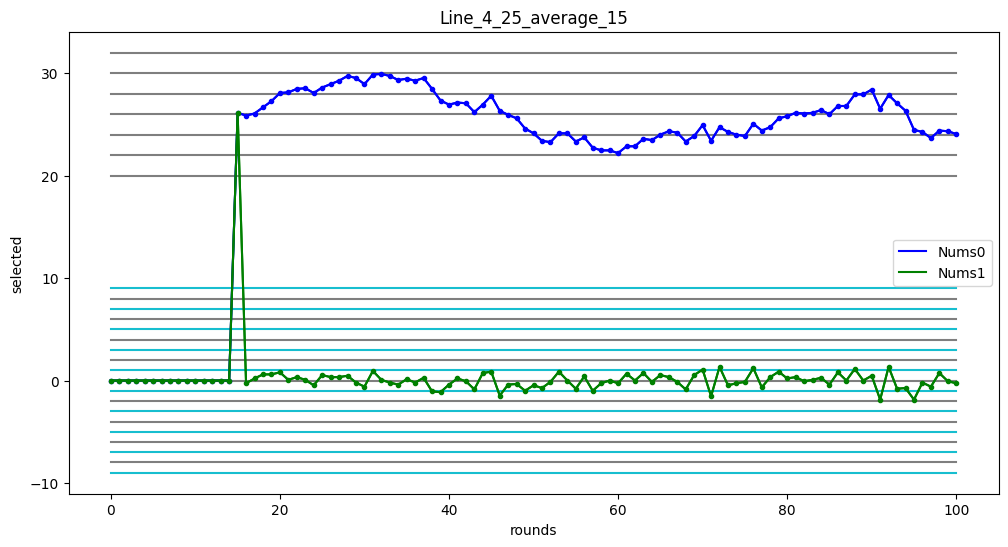

________________________________________
최소값          = [22.95, 23.1, 23.15, 23.2, 23.3]
최대값          = [29.25, 29.4, 29.45, 29.6, 29.7]
마지막          = [25.2, 25.0, 24.75, 24.55, 24.0]


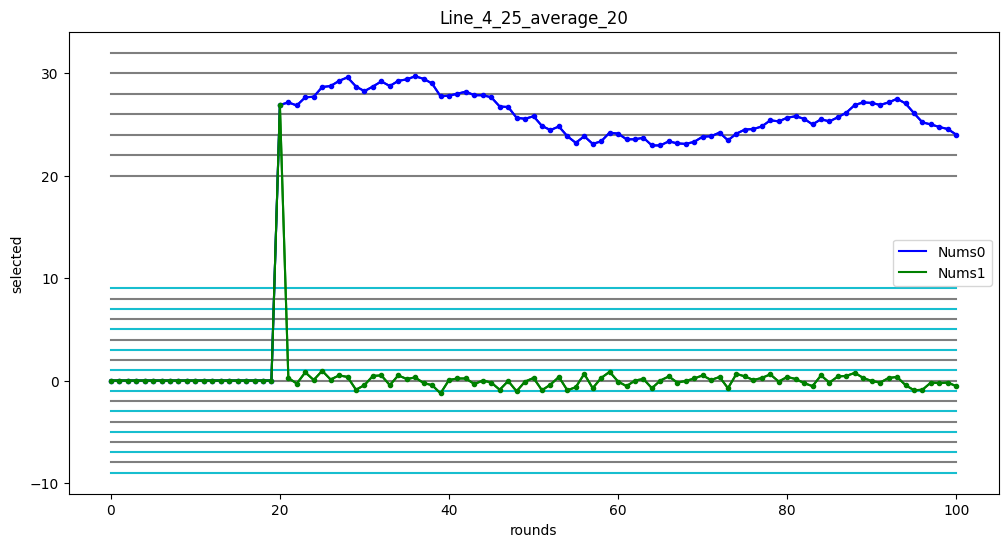

________________________________________
최소값          = [22.92, 23.0, 23.16, 23.24, 23.28]
최대값          = [28.76, 28.8, 28.84, 28.96, 29.2]
마지막          = [25.76, 25.0, 25.56, 25.48, 25.4]


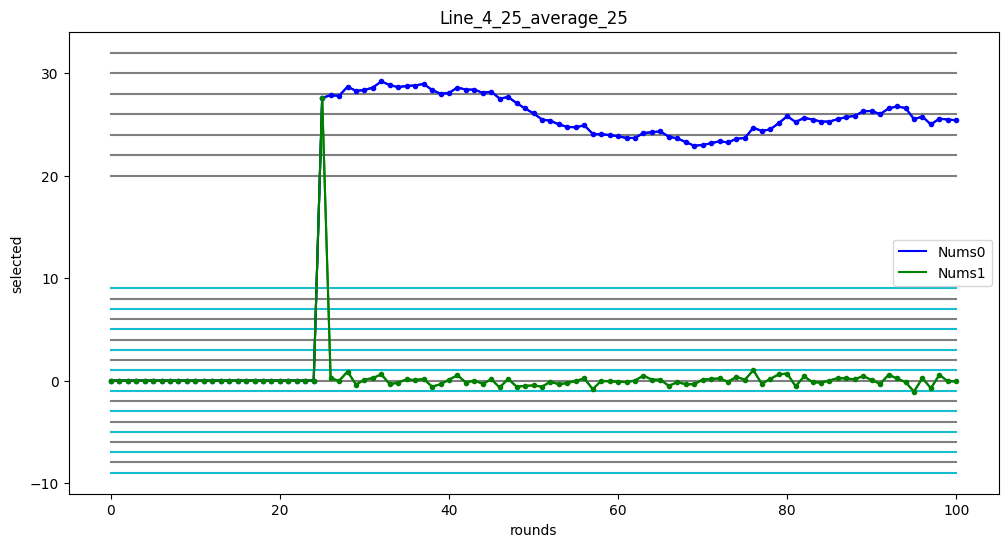

________________________________________
최소값          = [23.033333333333335, 23.233333333333334, 23.366666666666667, 23.566666666666666, 23.633333333333333]
최대값          = [28.366666666666667, 28.5, 28.7, 28.766666666666666, 29.0]
마지막          = [25.2, 24.866666666666667, 25.266666666666666, 25.366666666666667, 25.033333333333335]


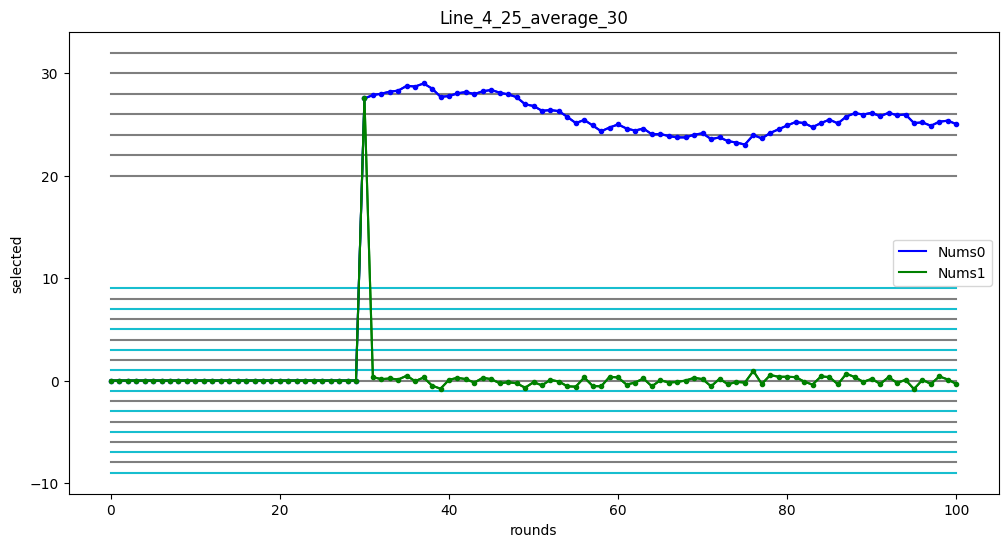

________________________________________
최소값          = [23.85, 23.95, 23.975, 24.125, 24.2]
최대값          = [27.625, 27.75, 27.775, 27.975, 28.15]
마지막          = [24.875, 24.9, 25.075, 24.925, 24.825]


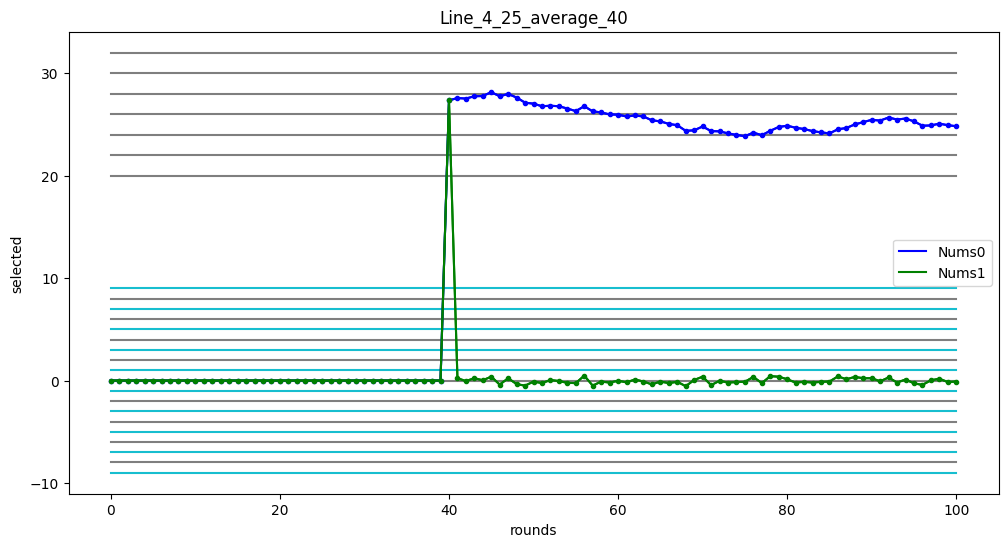

________________________________________
최소값          = [24.18, 24.26, 24.4, 24.46, 24.54]
최대값          = [26.58, 26.64, 26.66, 26.76, 26.84]
마지막          = [24.46, 24.18, 24.4, 24.54, 24.54]


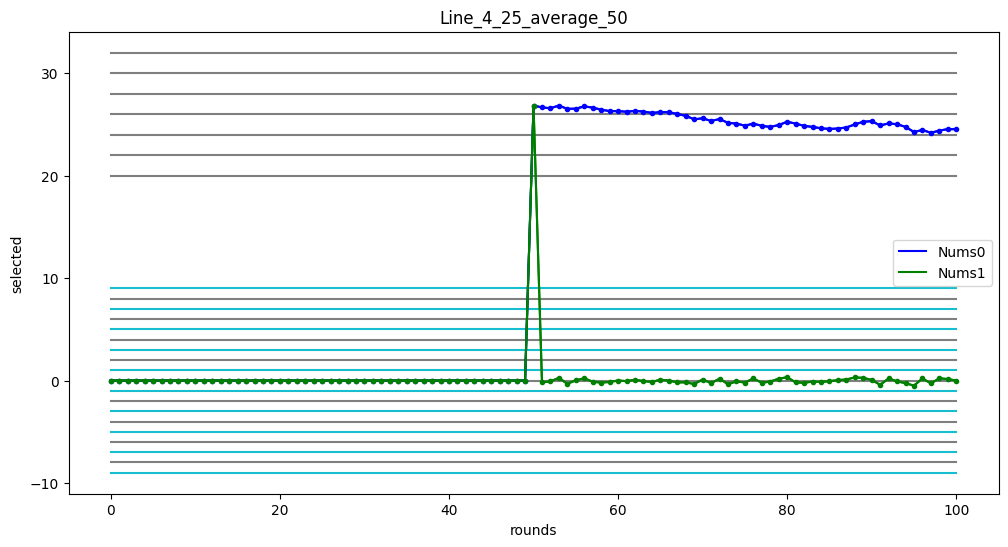

________________________________________
최소값          = [24.3, 24.5, 24.533333333333335, 24.583333333333332, 24.6]
최대값          = [26.266666666666666, 26.283333333333335, 26.366666666666667, 26.4, 26.416666666666668]
마지막          = [24.533333333333335, 24.3, 24.5, 24.683333333333334, 24.583333333333332]


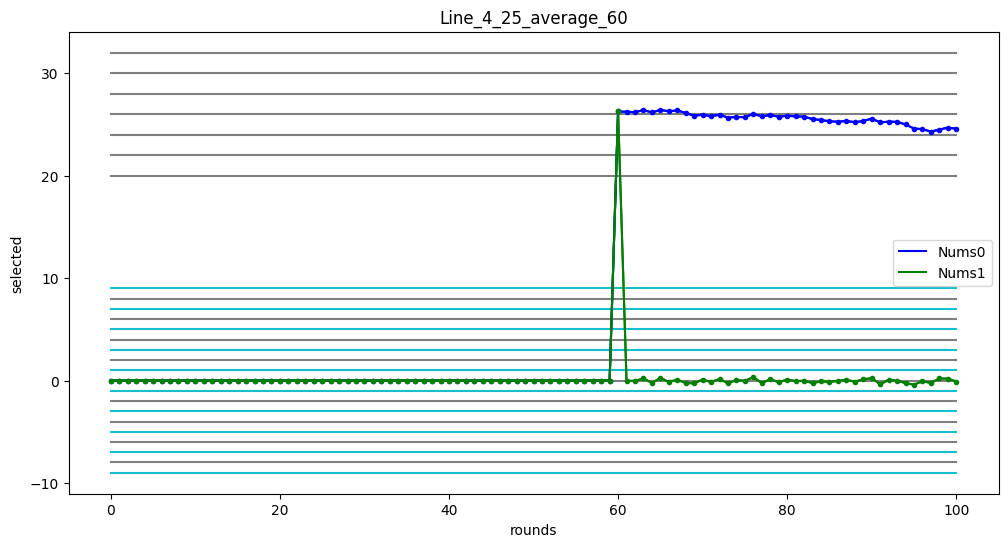

In [65]:
Round = 4
################################
selected = Round - 1
ext_data = 25
wanted_data_length = 20
helper_line_nums_1 = [5, 10, 15, 20, 22, 23, 24, 25, 26, 30, 35]
helper_line_nums_2 = [-9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20, 22, 24, 26, 28, 30, 32]
lengths = [2, 5, 8, 10, 13, 15, 20, 25, 30, 40, 50, 60]
start_pos_0 = 110
start_pos_1 = 300
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

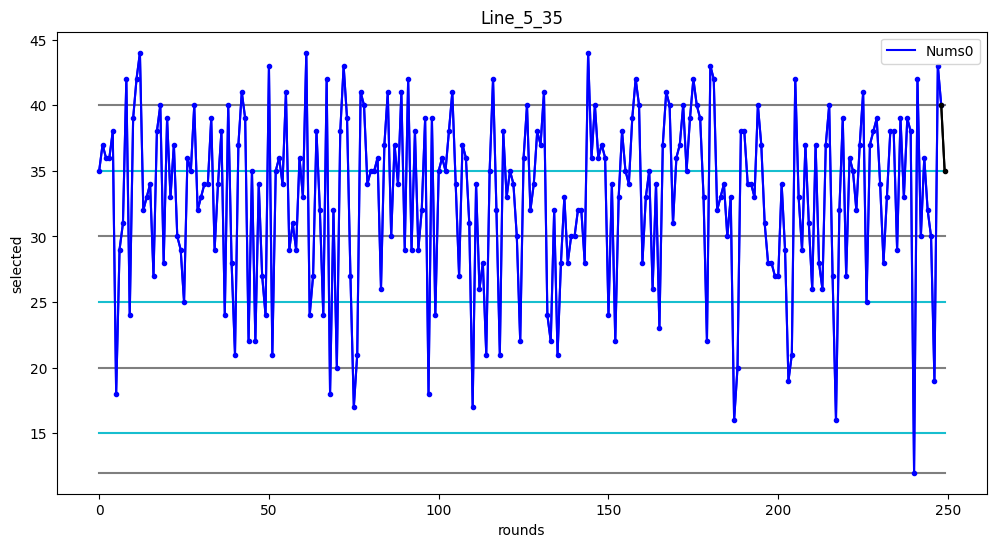

최소 값         = [12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]
최대 값         = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
사용자 선택       = 35
마지막 값        = 40
마지막 값들       = [39, 34, 28, 33, 38, 38, 29, 39, 33, 39, 38, 12, 42, 30, 36, 32, 30, 19, 43, 40]
자주 나오는 값(부분) = [(26, 7), (31, 7), (21, 7), (24, 8), (30, 9), (22, 9), (41, 11), (29, 12), (27, 13), (42, 13), (28, 13), (40, 14), (32, 15), (33, 17), (36, 18), (38, 18), (35, 18), (37, 19), (39, 20), (34, 23)]
자주 나오는 값(전체) = [(26, 9), (22, 10), (43, 12), (24, 13), (31, 13), (41, 13), (30, 14), (28, 15), (29, 16), (32, 17), (27, 18), (42, 18), (35, 19), (40, 19), (36, 22), (38, 23), (37, 23), (33, 28), (39, 28), (34, 30)]
마지막 수의 앞과 뒤  = [[34, 40, 39], [29, 40, 35], [31, 40, 41], [33, 40, 43], [37, 40, 30], [31, 40, 23], [38, 40, 28], [35, 40, 32], [24, 40, 28], [41, 40, 34], [36, 40, 32], [36, 40, 36], [42, 40, 28], [41, 40, 31], [37, 40, 35], [42, 40, 39], [33, 40, 37

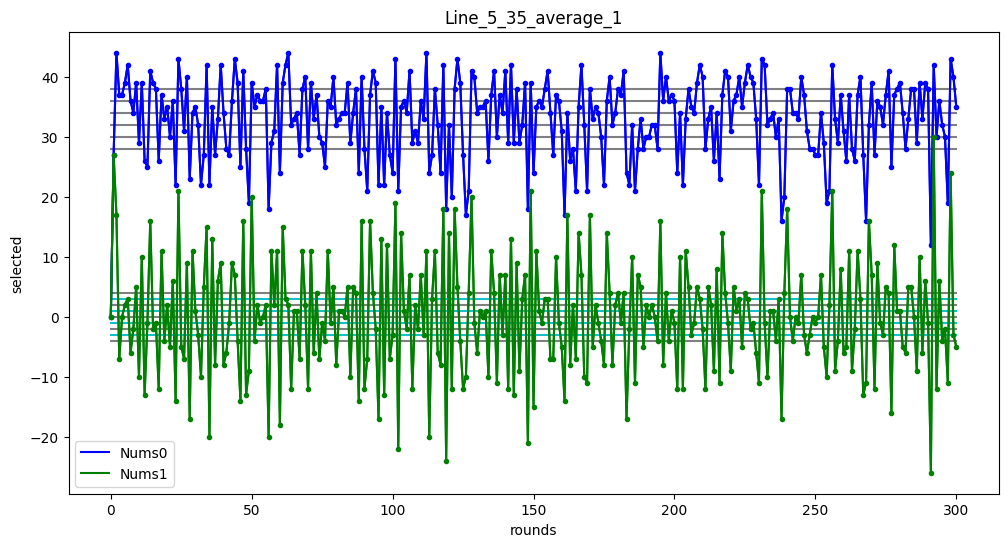

________________________________________
최소값          = [25.2, 25.4, 26.0, 26.6, 27.2]
최대값          = [38.2, 38.6, 39.0, 39.2, 39.8]
마지막          = [34.0, 29.4, 32.0, 32.8, 33.4]


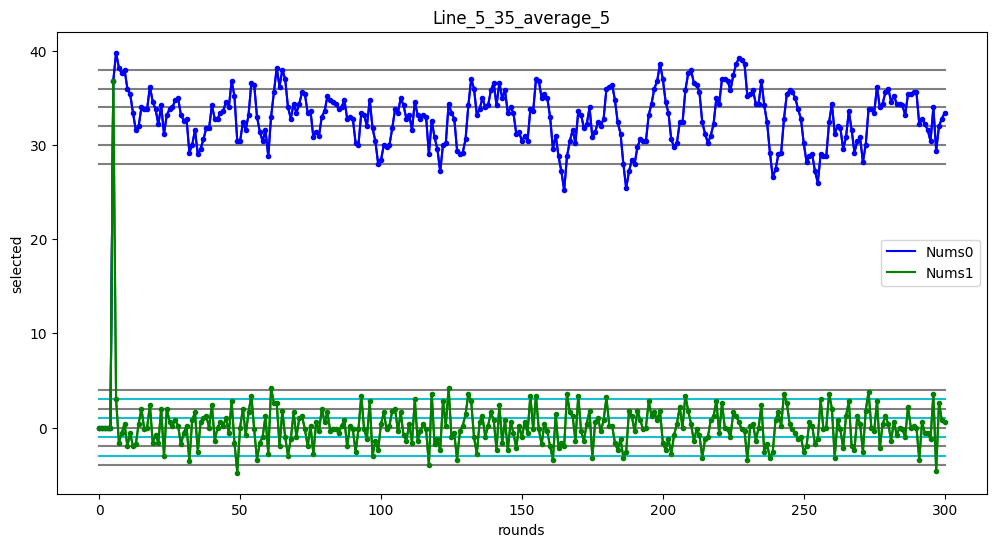

________________________________________
최소값          = [26.625, 27.25, 27.875, 28.0, 28.375]
최대값          = [37.125, 37.375, 37.5, 38.125, 38.5]
마지막          = [32.375, 29.875, 30.5, 34.0, 33.125]


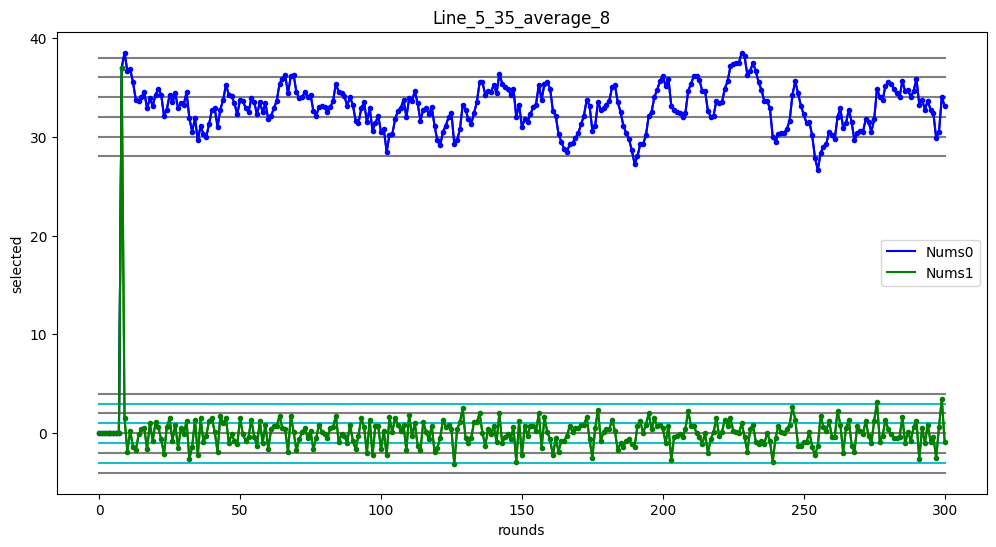

________________________________________
최소값          = [28.0, 28.1, 28.6, 28.7, 28.8]
최대값          = [37.5, 37.6, 37.8, 37.9, 38.1]
마지막          = [33.1, 31.1, 32.1, 32.2, 31.9]


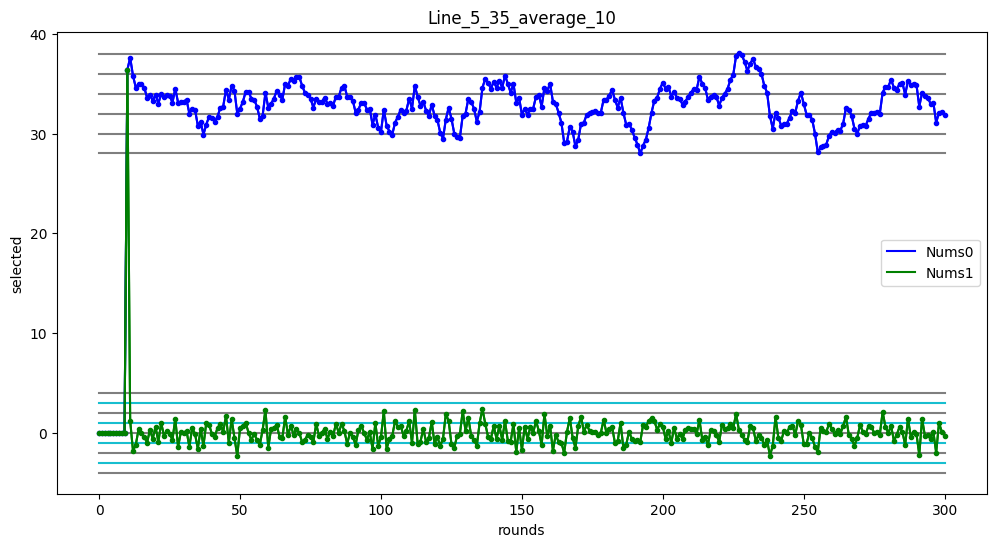

________________________________________
최소값          = [29.307692307692307, 29.46153846153846, 29.53846153846154, 29.615384615384617, 29.76923076923077]
최대값          = [36.53846153846154, 36.69230769230769, 36.84615384615385, 36.92307692307692, 37.69230769230769]
마지막          = [33.53846153846154, 32.07692307692308, 32.46153846153846, 33.30769230769231, 33.0]


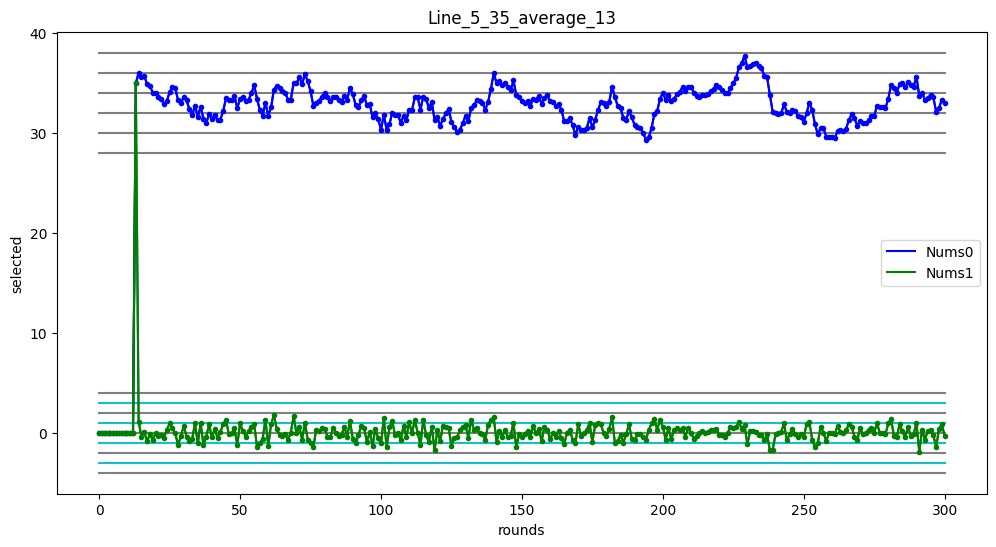

________________________________________
최소값          = [29.466666666666665, 29.733333333333334, 29.866666666666667, 29.933333333333334, 30.2]
최대값          = [36.333333333333336, 36.46666666666667, 36.733333333333334, 37.0, 37.333333333333336]
마지막          = [33.13333333333333, 32.53333333333333, 33.2, 33.333333333333336, 33.13333333333333]


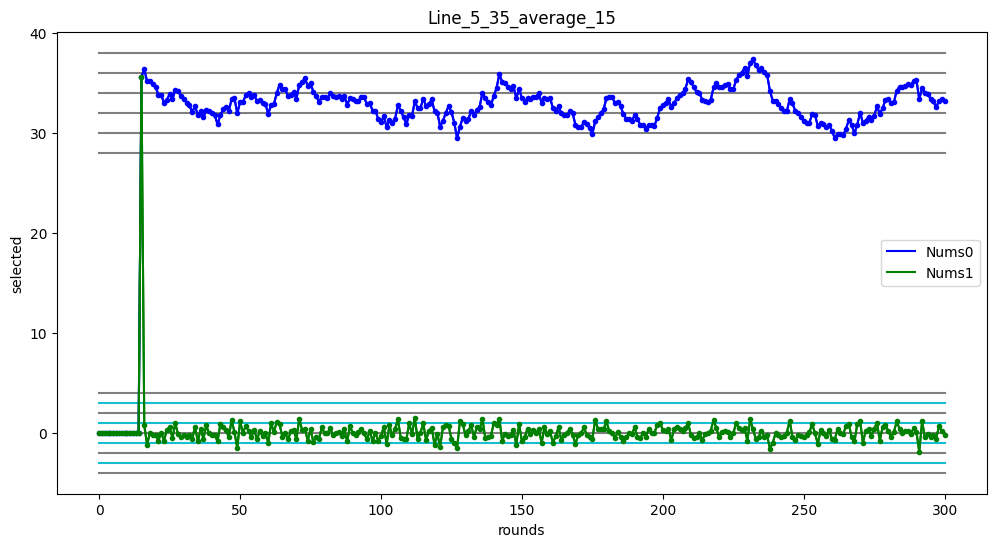

________________________________________
최소값          = [29.7, 29.85, 29.9, 30.3, 30.35]
최대값          = [35.75, 35.9, 35.95, 36.1, 36.3]
마지막          = [33.5, 33.2, 33.5, 33.6, 33.4]


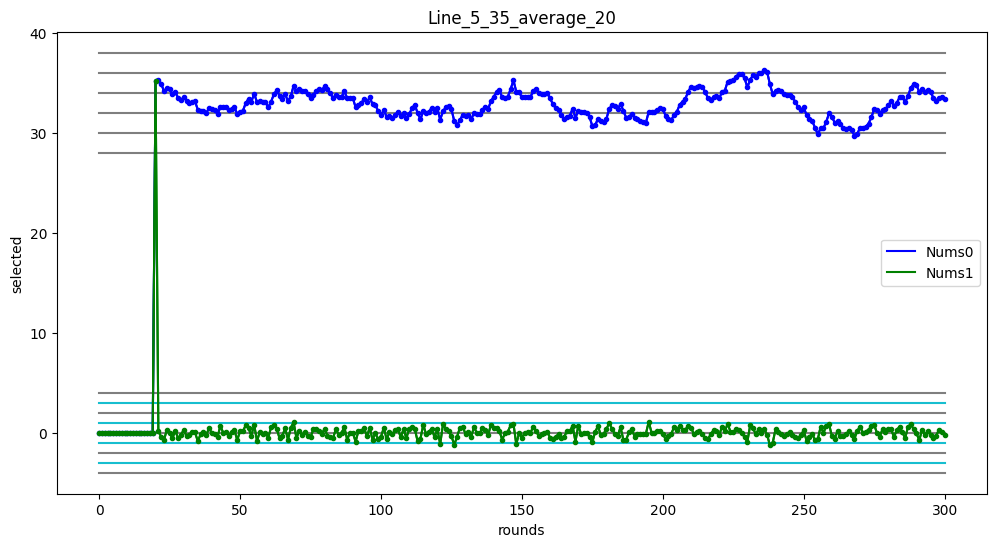

In [47]:
Round = 5
###################
selected = Round - 1
ext_data = 35
wanted_data_length = 20
helper_line_nums_1 = [12, 15, 20, 25, 30, 35, 40]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 28, 30, 32, 34, 36, 38]
lengths = [1, 5, 8, 10, 13, 15, 20]
start_pos_0 = 150
start_pos_1 = 100
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

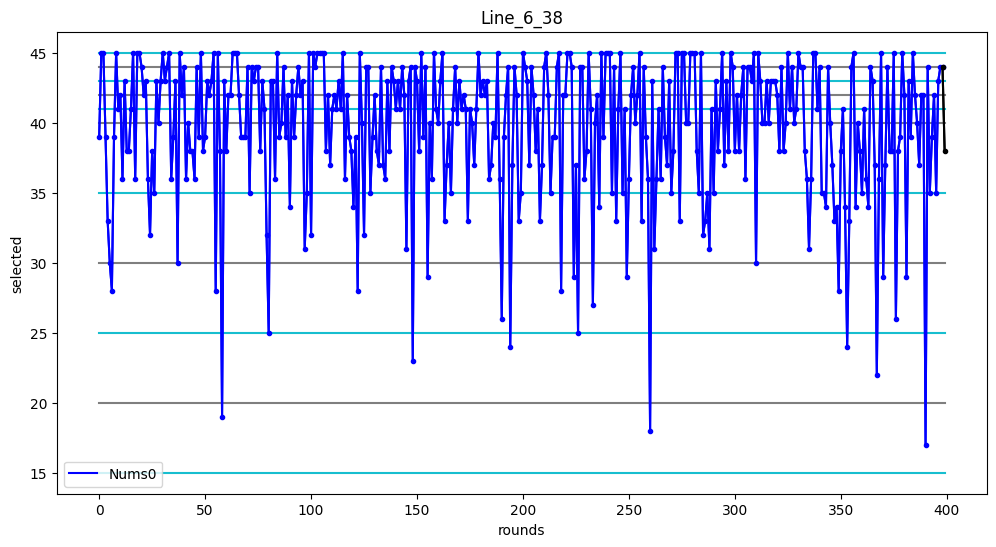

최소 값         = [17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
최대 값         = [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
사용자 선택       = 38
마지막 값        = 44
마지막 값들       = [45, 42, 29, 43, 39, 45, 42, 40, 37, 42, 42, 17, 44, 35, 39, 42, 35, 43, 44, 44]
자주 나오는 값(부분) = [(26, 2), (24, 2), (30, 3), (28, 5), (32, 5), (31, 5), (29, 5), (34, 8), (33, 11), (37, 16), (35, 18), (36, 22), (40, 22), (39, 26), (41, 26), (38, 31), (42, 35), (43, 39), (44, 49), (45, 62)]
자주 나오는 값(전체) = [(26, 2), (24, 2), (30, 3), (28, 5), (32, 5), (31, 5), (29, 5), (34, 8), (33, 11), (37, 16), (35, 18), (36, 22), (40, 22), (39, 26), (41, 26), (38, 30), (42, 35), (43, 39), (44, 49), (45, 62)]
마지막 수의 앞과 뒤  = [[45, 44, 42], [43, 44, 45], [42, 44, 36], [36, 44, 39], [39, 44, 35], [35, 44, 43], [43, 44, 44], [44, 44, 38], [40, 44, 39], [42, 44, 42], [45, 44, 45], [32, 44, 44], [44, 44, 35], [37, 44, 37], [38, 44, 43], [41, 44, 42], [43, 44, 23], [23, 4

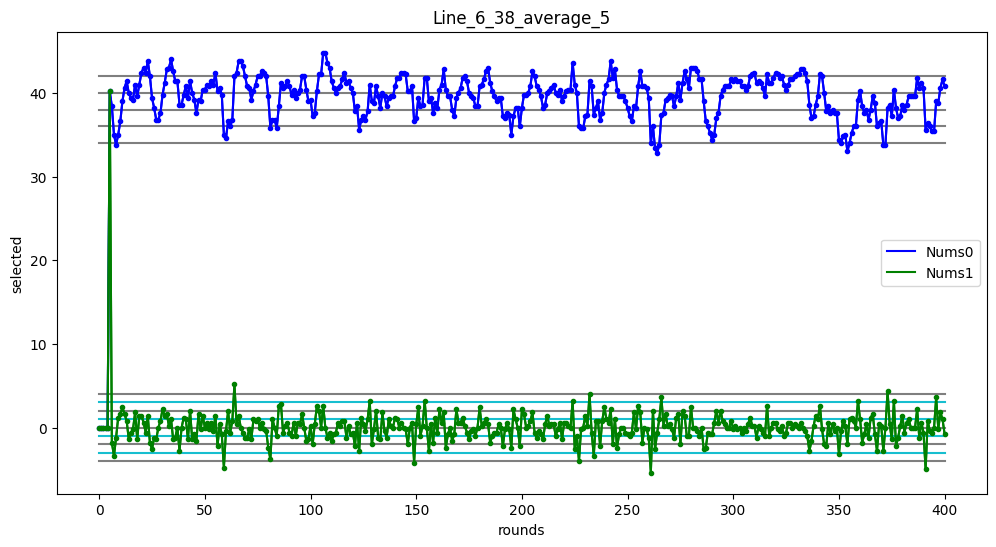

________________________________________
최소값          = [33.125, 33.625, 34.5, 35.0, 35.625]
최대값          = [42.75, 42.875, 43.0, 43.25, 43.625]
마지막          = [37.0, 37.125, 37.375, 40.75, 40.0]


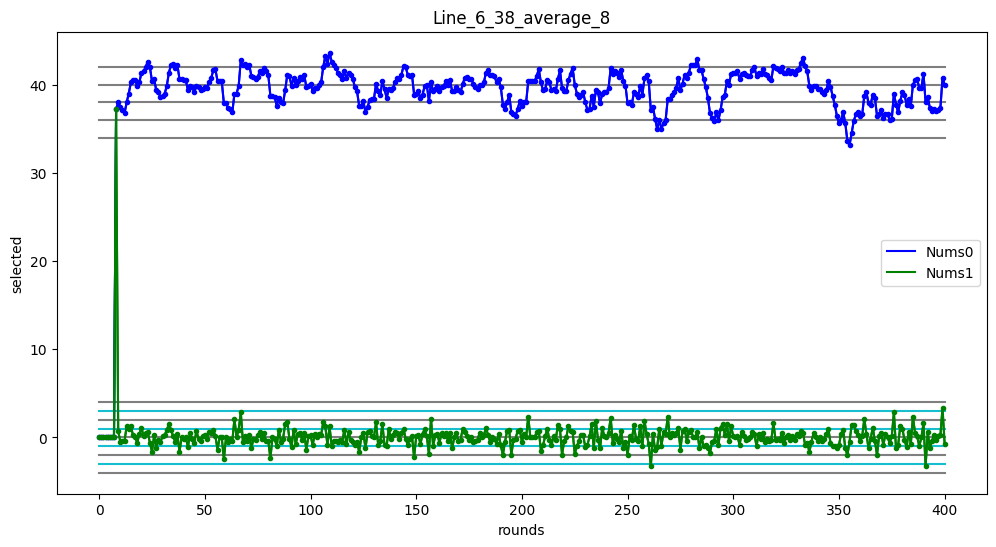

________________________________________
최소값          = [34.2, 34.6, 35.3, 35.4, 35.5]
최대값          = [42.3, 42.4, 42.6, 42.7, 42.8]
마지막          = [37.3, 37.6, 38.3, 38.5, 38.1]


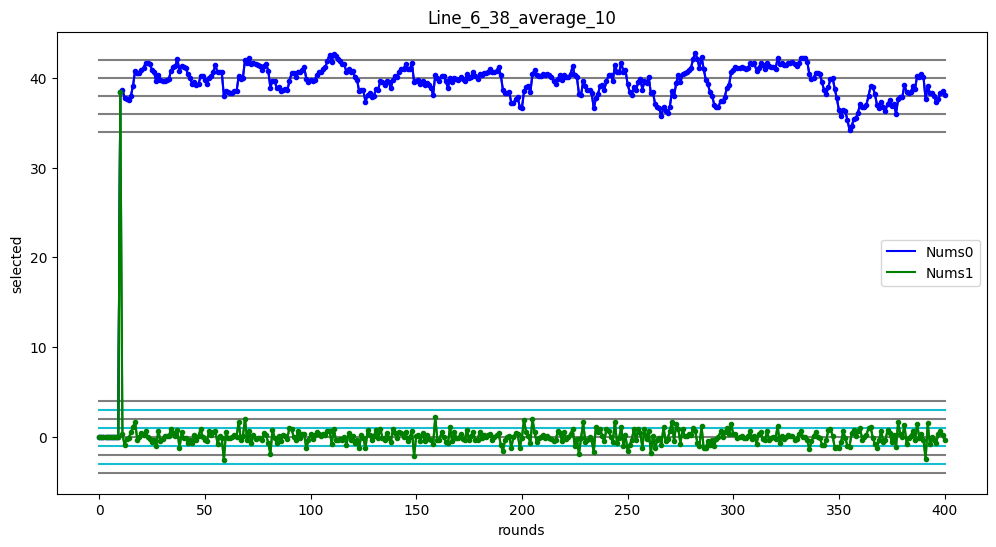

________________________________________
최소값          = [35.0, 35.15384615384615, 35.69230769230769, 35.76923076923077, 35.84615384615385]
최대값          = [42.0, 42.15384615384615, 42.23076923076923, 42.30769230769231, 42.53846153846154]
마지막          = [38.38461538461539, 38.69230769230769, 38.61538461538461, 38.76923076923077, 38.61538461538461]


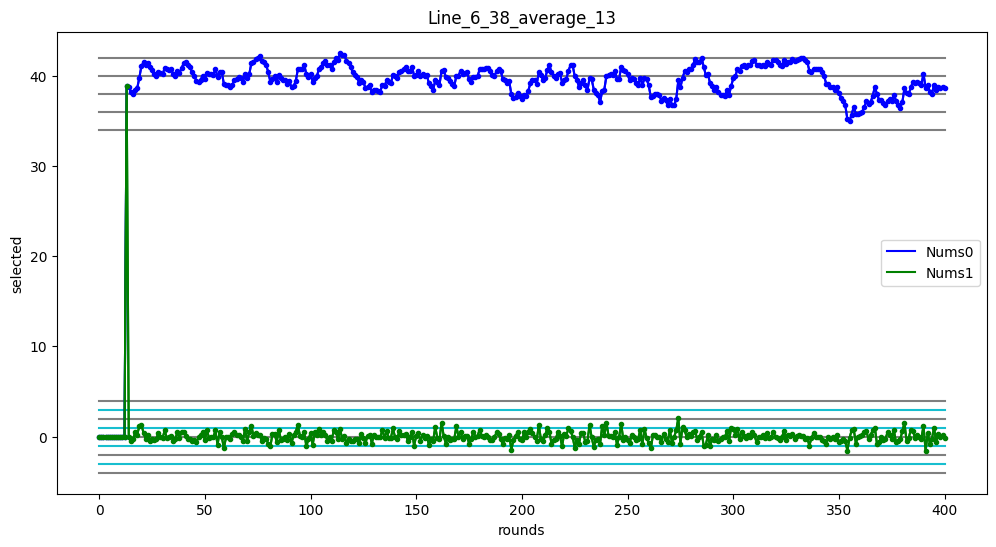

________________________________________
최소값          = [35.6, 35.86666666666667, 36.13333333333333, 36.2, 36.266666666666666]
최대값          = [41.93333333333333, 42.0, 42.06666666666667, 42.13333333333333, 42.6]
마지막          = [38.06666666666667, 39.0, 39.06666666666667, 39.4, 38.93333333333333]


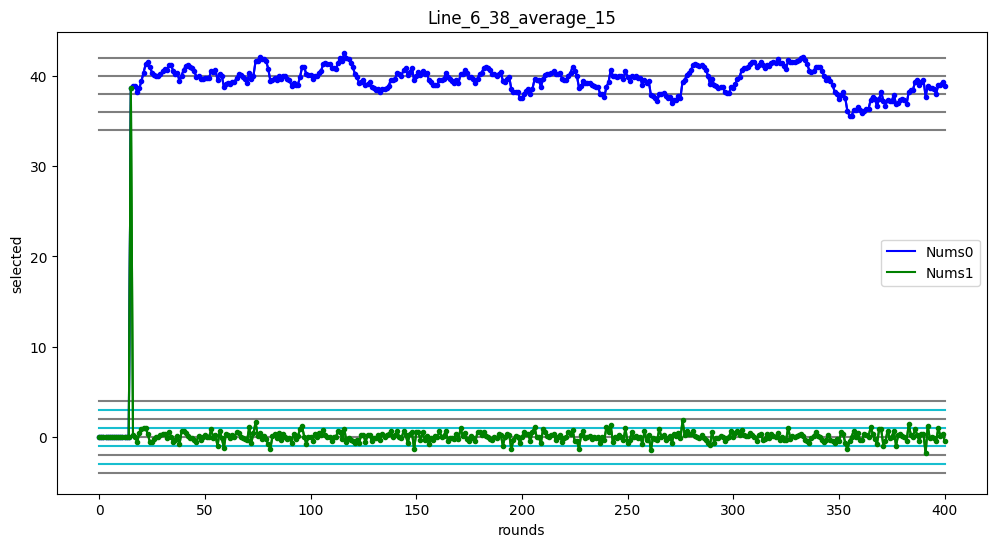

________________________________________
최소값          = [36.25, 36.3, 36.35, 36.55, 36.6]
최대값          = [41.65, 41.75, 41.8, 41.85, 41.9]
마지막          = [38.05, 38.9, 39.2, 39.45, 39.1]


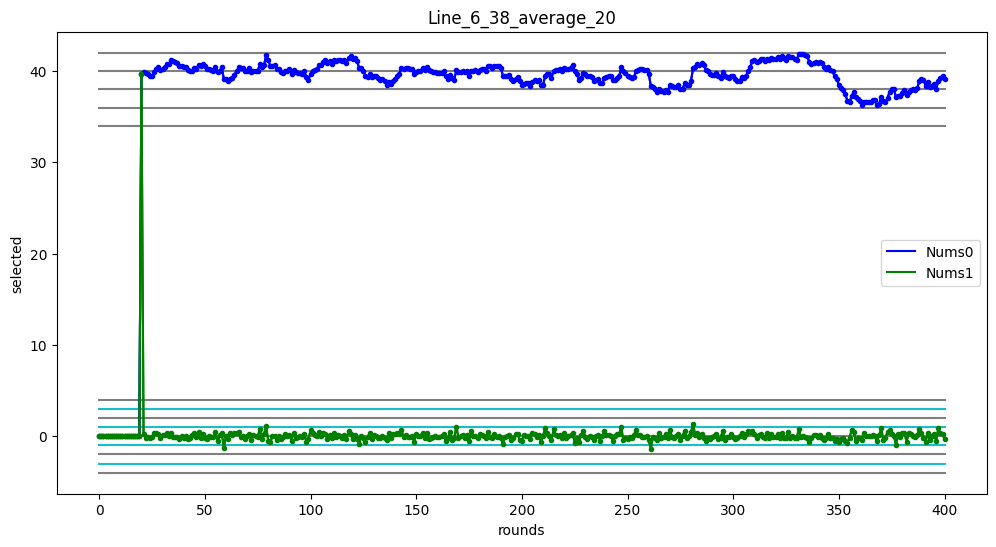

In [36]:
Round = 6
#################
selected = Round - 1
ext_data = 38
wanted_data_length = 20
helper_line_nums_1 = [15, 20, 25, 30, 35, 40, 41, 42, 43, 44, 45]
helper_line_nums_2 = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 34, 36, 38, 40, 42]
lengths = [5, 8, 10, 13, 15, 20]
start_pos_0 = 0
start_pos_1 = 0
num_data=row_list_none_last[selected]

get_information(selected=selected,
                num_data=num_data,
                ext_data=ext_data,
                wanted_data_length=wanted_data_length,
                helper_line_nums_1=helper_line_nums_1,
                helper_line_nums_2=helper_line_nums_2,
                show_diff=True,
                lengths=lengths,
                start_pos_0=start_pos_0,
                start_pos_1=start_pos_1
               )
candidate[selected] = ext_data

In [66]:
print(candidate)

{0: 13, 1: 14, 2: 23, 3: 32, 4: 35, 5: 38}


In [67]:
candidates = [[1, 3, 21, 28, 33, 40]
              ]

lasts = [
    [1, 16, 22, 23, 34, 38],
    [8, 16, 18, 19, 30, 33],
    [6, 9, 16, 19, 32, 36]
    ]

reals = [[3, 16, 18, 24, 40, 44],
         [5, 6, 11, 27, 43, 44]]

In [68]:
def draw_nums(ext_datas, is_pre_data=False, fig_size=(15, 8)):
    show_cols = [0, 1, 2, 3, 4, 5]
    show_label = False
    show_cnt = 100
    start_pos = row_length - show_cnt
    show_data = []
    for i in range(6):
        end_pos = -1 if is_pre_data else len(row_list_none_last[i])
        show_data.append(row_list_none_last[i][start_pos:end_pos])
    print(ext_datas)
    draw_scatter(show_data, f'line num : {key}', True, True, show_cols, ext_datas, show_label, helper_line_nums=[10, 20, 30, 40], fig_size=fig_size)

print('current work', datetime.now())

current work 2025-07-11 10:41:55.933100


[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


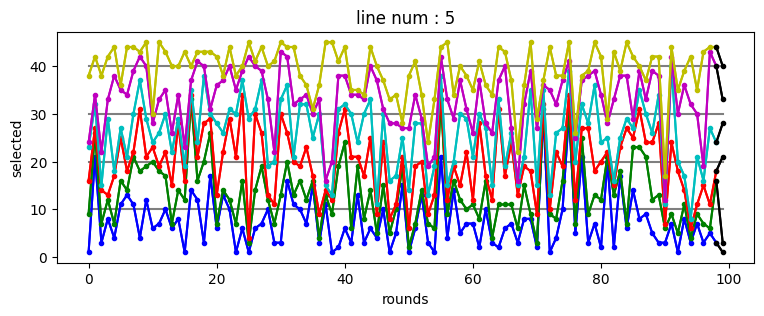

In [69]:
## My select 1180
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas=ext_datas, fig_size=(9, 3))

[(0, 1), (1, 3), (2, 21), (3, 28), (4, 33), (5, 40)]


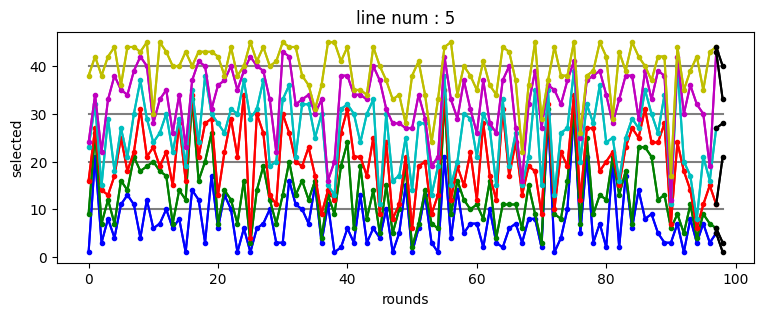

In [70]:
## My Select 1180 with 1178
ext_datas = [(i, candidates[0][i]) for i in range(len(candidates[0]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 8), (1, 16), (2, 18), (3, 19), (4, 30), (5, 33)]


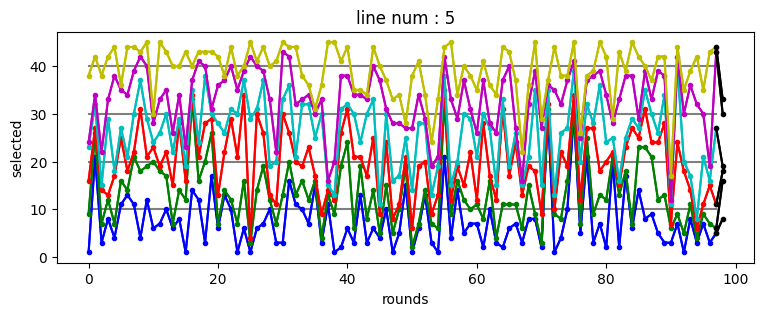

In [256]:
## My Select 1179_1 with 1178
cur_select = 1
ext_datas = [(i, lasts[cur_select][i]) for i in range(len(lasts[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

[(0, 3), (1, 16), (2, 18), (3, 24), (4, 40), (5, 44)]


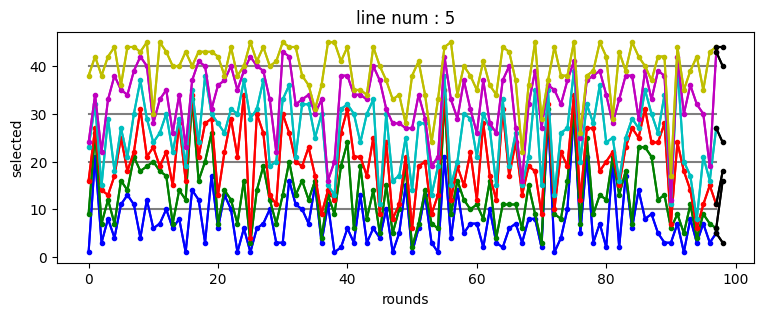

In [257]:
## real
cur_select = 0
ext_datas = [(i, reals[cur_select][i]) for i in range(len(reals[cur_select]))]
draw_nums(ext_datas, is_pre_data=True, fig_size=(9,3))

In [ ]:
print(sums)
datas = (
    ((1750505603, [[7, 10, 18, 23, 28, 39]]), 0.5),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((1750505748, [[6, 9, 20, 25, 31, 42]]), 575.33),
    ((115870, [[8, 11, 19, 26, 30, 43]]), 32.164),
    )
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')

In [113]:
print(sums[-20:])
datas = (
    ((115367, [[10, 13, 19, 23, 28, 40]]), 61.59),
    ((116885, [[7, 12, 24, 28, 34, 41]]), 76.246),
    ((114225, [[10, 13, 20, 24, 30, 40]]), 202.36),
    ((11114613, [[8, 12, 21, 26, 31, 39]]), 77.591),
    ((31116739, [[6, 9, 21, 28, 32, 42]]), 730.62006),
    ((114106, [[9, 12, 21, 26, 30, 40]]), 393.44),
    ((31116775, [[8, 13, 21, 27, 34, 41]]), 302.73),
)
for data in datas:
    print(f'{data[0][1][0]}')
    print(f'sum = {sum(data[0][1][0])}')
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]
   ]
for i in l1:
    print(i)
    print(f'sum = {sum(i)}')
last = [3, 7, 15, 16, 19, 43]
print(f'{"*"*20}\nlast : \n{last}\nsum = {sum(last)}')


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 103]
[10, 13, 19, 23, 28, 40]
sum = 133
[7, 12, 24, 28, 34, 41]
sum = 146
[10, 13, 20, 24, 30, 40]
sum = 137
[8, 12, 21, 26, 31, 39]
sum = 137
[6, 9, 21, 28, 32, 42]
sum = 138
[9, 12, 21, 26, 30, 40]
sum = 138
[8, 13, 21, 27, 34, 41]
sum = 144
[12, 21, 26, 28, 34, 39]
sum = 160
[13, 20, 24, 30, 40, 42]
sum = 169
********************
last : 
[3, 7, 15, 16, 19, 43]
sum = 103


[144, 158, 134, 145, 122, 160, 152, 160, 176, 154, 148, 158, 56, 166, 109, 125, 95, 113, 103, 138]


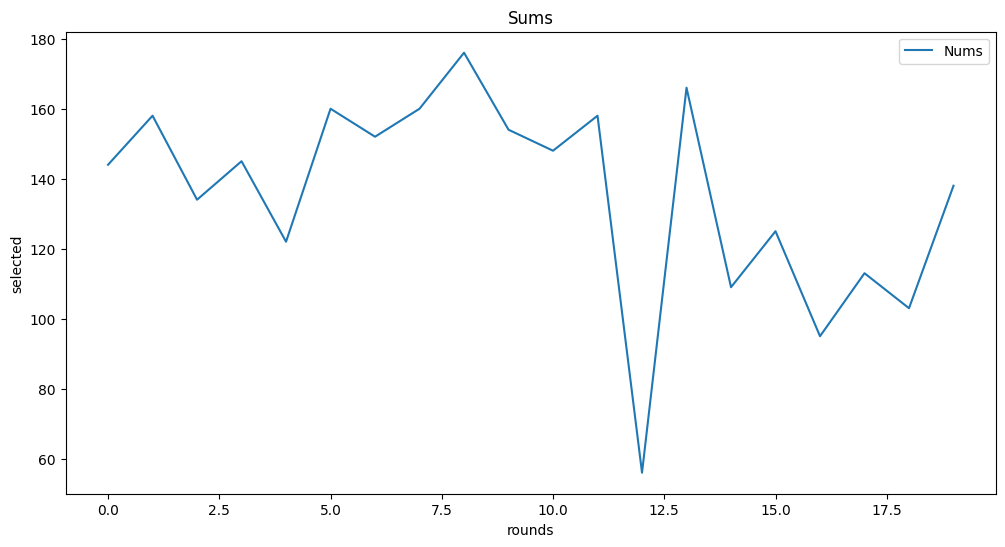

In [115]:
draw_graph(sums[-20:-1]+[138], f'Sums')

In [ ]:
l1=[[12,21,26,28, 34, 39],
    [13, 20, 24, 30, 40,42]]
for i in l1:
    print(sum(i))